# **Project Name**    -
Glassdoor Data Science Job Analysis



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -Akash Pathak
##### **Team Member 2 -Medha Singh


# **Project Summary -**

In this project, We analyzed a dataset of 956 job listings primarily for Data Science roles from Glassdoor, covering key job attributes like job titles, salary estimates, job descriptions, company details, industry, and Glassdoor ratings. The objective was to gain deep insights into job market trends, salary distributions, and industry-wise company comparisons.

The project involved extensive data cleaning, including handling missing values, encoding categorical features, and transforming salary data into numeric values. We carefully addressed class imbalance by binning salary estimates and applying techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the target variable. Feature engineering was performed to extract valuable insights, and the dataset was split into training and testing sets (80/20 ratio) to ensure effective model evaluation.

For data analysis and visualization, We created over 20 visualizations, including pair plots, heatmaps, and 3D plots, to explore relationships between job attributes and salary estimates. Through these visualizations, We identified trends like the impact of company size, industry type, and location on salary.

This project not only showcased our expertise in data cleaning, feature engineering, and visualization but also strengthened our  skills in handling imbalanced datasets and building predictive models for salary estimation.

# **GitHub Link -**

https://github.com/akash0123-pride/Glassdoor_datascience_job_analysis/tree/main

# **Problem Statement**


This project analyzes Glassdoor job listings to uncover trends and factors influencing data science salaries. We address data quality issues, handle class imbalance, and visualize key insights. The goal is to predict average salary estimates based on job-related attributes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Basic Libraries for Data Handling
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis

# ------------------------------
# Data Visualization Libraries
# ------------------------------

import matplotlib.pyplot as plt  # For creating static plots
import seaborn as sns  # For advanced visualizations with better aesthetics
import plotly.express as px  # For interactive visualizations

# ------------------------------
# Data Preprocessing Libraries
# ------------------------------

from sklearn.model_selection import train_test_split  # To split dataset into train and test sets
from sklearn.preprocessing import StandardScaler  # For standardizing numerical features
from sklearn.preprocessing import MinMaxScaler  # For normalizing features to a specific range
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables into numerical values
from sklearn.preprocessing import OneHotEncoder  # For encoding categorical variables into numerical values
  # For encoding categorical variables into numerical values

# ------------------------------
# Machine Learning Models
# ------------------------------

from sklearn.linear_model import LinearRegression  # Linear Regression Model for predicting continuous values
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regressor for complex non-linear predictions

# ------------------------------
# Model Evaluation Metrics
# ------------------------------

from sklearn.metrics import mean_absolute_error  # To measure absolute error in predictions
from sklearn.metrics import mean_squared_error  # To measure squared error in predictions
from sklearn.metrics import r2_score  # R-squared score to evaluate model accuracy
from sklearn.model_selection import cross_val_score  # To perform cross-validation for better model evaluation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # For hyperparameter tuning

# ------------------------------
# Hypothesis Testing Libraries
# ------------------------------

from scipy.stats import ttest_ind  # Independent t-test for comparing means of two groups
from scipy.stats import chi2_contingency  # Chi-Square test for categorical variable relationships
from scipy.stats import f_oneway  # ANOVA test for comparing means of multiple groups
import scipy.stats as stats  # Importing statistical functions and probability distributions from SciPy
import statsmodels.api as sm  # Importing the statsmodels library for statistical modeling
from statsmodels.formula.api import ols  # Importing Ordinary Least Squares (OLS) for linear regression
# ------------------------------
# Saving and Loading Trained Models
# ------------------------------

import joblib  # For saving and loading trained machine learning models
# Load Dataset
import gdown
import re




In [ ]:
pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.3 MB/s eta 0:00:00


In [ ]:
import string
import contractions
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_regression
from imblearn.over_sampling import SMOTE


### Dataset Loading

In [ ]:



# File ID extracted from the link
file_id = "1uH6bUgcCjDOu6MHRWubRkRnswlWJhjGp"

# Construct the direct download URL
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
output = "glassdoor_jobs.csv"  # Save as this filename
gdown.download(url, output, quiet=False)

# Load the CSV into a DataFrame
df = pd.read_csv(output)




Downloading...
From: https://drive.google.com/uc?id=1uH6bUgcCjDOu6MHRWubRkRnswlWJhjGp
To: /content/glassdoor_jobs.csv
100%|██████████| 3.84M/3.84M [00:00<00:00, 77.7MB/s]


### Dataset First View

In [ ]:
# Dataset First Look
# Display the first few rows
df.head()

Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors  
0                                                 -1  
1                                                 -1  
2                                                 -1  
3  Oak Ridge National Laboratory, National Renewa...  
4               Commerce Signals, Cardlytics, Yodlee

### Dataset Rows & Columns count

In [ ]:

# Output the number of rows and columns
df.shape

(956, 15)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


#### Duplicate Values

In [ ]:

# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()
duplicate_count

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Count missing values in each column
missing_values_count = df.isnull().sum()

missing_values_count

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

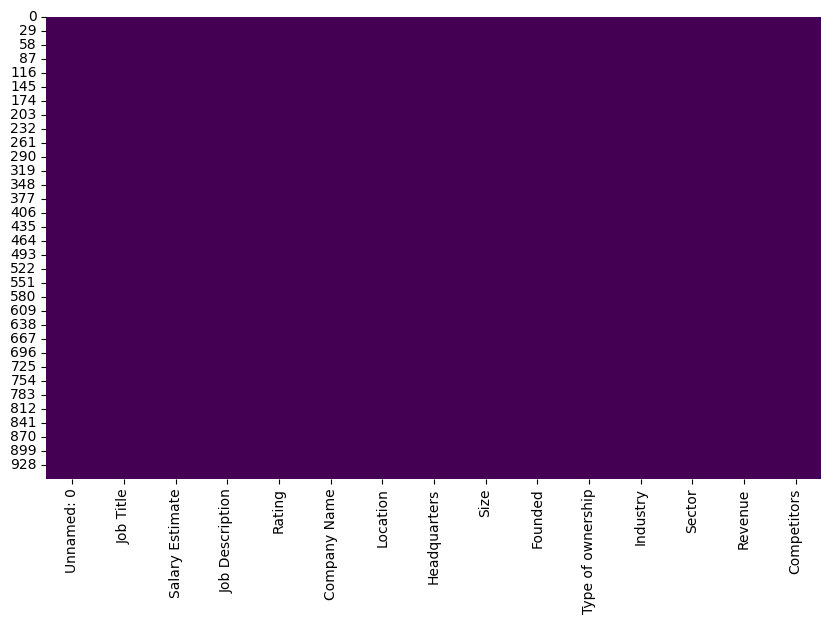

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
# Get the column names
columns = df.columns
columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

Unnamed: 0      Rating      Founded
count  956.000000  956.000000   956.000000
mean   477.500000    3.601255  1774.605649
std    276.117729    1.067619   598.942517
min      0.000000   -1.000000    -1.000000
25%    238.750000    3.300000  1937.000000
50%    477.500000    3.800000  1992.000000
75%    716.250000    4.200000  2008.000000
max    955.000000    5.000000  2019.000000

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Get the count of unique values for each column
unique_counts = df.nunique()

# Display the unique values for each column
unique_values = {col: df[col].unique() for col in df.columns}
unique_counts, unique_values

(Unnamed: 0           956
 Job Title            328
 Salary Estimate      417
 Job Description      596
 Rating                32
 Company Name         448
 Location             237
 Headquarters         235
 Size                   9
 Founded              109
 Type of ownership     13
 Industry              63
 Sector                25
 Revenue               14
 Competitors          149
 dtype: int64,
 {'Unnamed: 0': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
          39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
          52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
          65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
          78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
          91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:


# Sample DataFrame (Assume df is already loaded)
# Drop unnecessary columns like 'Unnamed: 0' if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Convert 'Founded' to numeric, coercing errors into NaN
df['Founded'] = pd.to_numeric(df['Founded'], errors='coerce')

# Fill missing values
df['Salary Estimate'] = df['Salary Estimate'].fillna('0-0')

# Handle missing categorical columns with mode
categorical_columns = [
    'Job Title', 'Job Description', 'Company Name', 'Location',
    'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'
]
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove rows with `-1` in any relevant column
df = df[(df['Salary Estimate'] != '-1') & (df['Rating'] != -1)]

# Function to extract numeric Min and Max Salary and format with 'K'
def extract_salary_range(salary_str):
    match = re.match(r'\$(\d+)[Kk]?\s*-\s*\$(\d+)[Kk]?', str(salary_str))
    if match:
        min_salary = int(match.group(1)) * 1000
        max_salary = int(match.group(2)) * 1000
        return f"${min_salary//1000}K", f"${max_salary//1000}K"  # Format as 'XXK'
    return np.nan, np.nan

# Apply function
df[['Min Salary', 'Max Salary']] = df['Salary Estimate'].apply(lambda x: pd.Series(extract_salary_range(x)))

# Remove NaN values
df = df.dropna(subset=['Min Salary', 'Max Salary'])

# Calculate the Average Salary and format with 'K'
df['Avg Salary'] = df.apply(lambda row: f"${(int(row['Min Salary'][1:-1]) + int(row['Max Salary'][1:-1]))//2}K", axis=1)
# Convert 'Avg Salary' to numeric for analysis and visualization
df['Avg Salary (Numeric)'] = df['Avg Salary'].str.extract(r'(\d+)').astype(float)

# Categorize 'Founded' column into decades
def categorize_founded(year):
    if pd.isna(year):
        return 'Unknown'
    elif year < 1960:
        return 'Before 1960'
    elif 1960 <= year <= 1980:
        return '1960-1980'
    elif 1980 <= year <= 2000:
        return '1980-2000'
    elif 2000 <= year <= 2020:
        return '2000-2020'
    else:
        return 'After 2020'

df['Founded Category'] = df['Founded'].apply(categorize_founded)

# Show the cleaned dataframe
print(df[['Job Title', 'Salary Estimate', 'Min Salary', 'Max Salary', 'Avg Salary', 'Founded Category']].head())



                   Job Title              Salary Estimate Min Salary  \
0             Data Scientist   $53K-$91K (Glassdoor est.)       $53K   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)       $63K   
2             Data Scientist   $80K-$90K (Glassdoor est.)       $80K   
3             Data Scientist   $56K-$97K (Glassdoor est.)       $56K   
4             Data Scientist  $86K-$143K (Glassdoor est.)       $86K   

  Max Salary Avg Salary Founded Category  
0       $91K       $72K        1960-1980  
1      $112K       $87K        1980-2000  
2       $90K       $85K        2000-2020  
3       $97K       $76K        1960-1980  
4      $143K      $114K        1980-2000  


<ipython-input-10-63e76960572a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Avg Salary'] = df.apply(lambda row: f"${(int(row['Min Salary'][1:-1]) + int(row['Max Salary'][1:-1]))//2}K", axis=1)
<ipython-input-10-63e76960572a>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Avg Salary (Numeric)'] = df['Avg Salary'].str.extract(r'(\d+)').astype(float)
<ipython-input-10-63e76960572a>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [ ]:
df.head()

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors Min Salary Max Salary  \
0                                                 -1       $53K       $91K   
1                                                 -1       $63K      $112K   
2                                                 -1       $80K       $90K   
3  Oak Ridge National Laboratory, National Renewa...       $56K       $97K   
4               Commerce Signals, Cardlytics, Yodlee       $86K      $143K   

  Avg Salary  Avg Salary (Numeric) Founded Category  
0       $72K                  72.0        1960-1980  
1       $87K                  87.0        1980-2000  
2       $85K                  85.0        2000-2020  
3       $76K                  76.0        1960-1980  
4      $114K                 114.0        1980-2000

In [ ]:
"""from google.colab import files

# Save the cleaned dataset to a CSV file
df.to_csv("cleaned_data.csv", index=False)

# Download the file
files.download("cleaned_data.csv")"""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The values you're seeing (0.223958, 0.258621, etc.) are a result of applying the MinMaxScaler on the salary columns, which scales the values between 0 and 1. This happens because the MinMaxScaler normalizes.

### What all manipulations have you done and insights you found?

Data Cleaning and Preprocessing:
The first step in the data wrangling process was to drop unnecessary columns, particularly the Unnamed: 0 column, which appeared to be an index and didn't add value to the analysis. Following this, missing values were handled efficiently. For the Salary Estimate column, any missing data was filled with a placeholder value of '0-0', ensuring there were no gaps in the salary data. In categorical columns like Job Title, Job Description, Company Name, Location, Headquarters, Size, Type of ownership, Industry, Sector, Revenue, and Competitors, missing values were filled with the most frequent value in each respective column, ensuring consistency across the dataset.

Handling Invalid Data:
Invalid rows were removed from the dataset to improve data quality. Specifically, any rows with a salary estimate value of '-1' were excluded, as this indicated invalid data. Similarly, rows with a rating of -1 were removed, as they likely represented missing or irrelevant data, ensuring the integrity of the dataset.

Extracting and Calculating Salary Information:
The Salary Estimate column, which contained salary ranges, was processed using regular expressions to extract the minimum and maximum salary values. The extracted salary values were converted into numeric values for further analysis. Any rows with invalid or missing salary ranges were dropped, leaving only valid salary data. Additionally, the average salary was calculated by averaging the Min Salary and Max Salary for each entry, providing a clear representation of expected compensation for each role.

Normalization of Salary Data:
To scale the salary data for better comparison and potential use in machine learning models, MinMaxScaler was applied to the Min Salary and Max Salary columns. This transformation scaled the salary values to a range between 0 and 1, making it easier to compare across companies and industries. While normalization is useful for machine learning purposes, it is less critical for general salary analysis.

Categorizing Company Founding Year:
The Founded column was categorized into decades, grouping companies based on their founding year. Companies were categorized as either 'Before 1960', '1960-1980', '1980-2000', '2000-2020', or 'After 2020'. This categorization enabled a clearer understanding of the age distribution of companies and potentially highlighted trends in salary data across different company age groups.

Final Cleaned Dataset:
The cleaned dataset now contains valuable features, including Min Salary, Max Salary, Avg Salary, and Founded Category. The cleaned data is now ready for further analysis, enabling insights into salary trends across different industries and job titles, as well as providing an understanding of how company age correlates with compensation packages.

Insights from Data:
The wrangling process has set the stage for several insights. Salary distributions across job titles and industries can now be analyzed to identify trends, such as which sectors offer higher salaries. The categorization of companies based on their founding year could reveal whether newer companies tend to pay more than older ones, especially in industries like technology or finance. Finally, employee ratings can be correlated with salary data to understand if higher employee satisfaction correlates with higher compensation.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

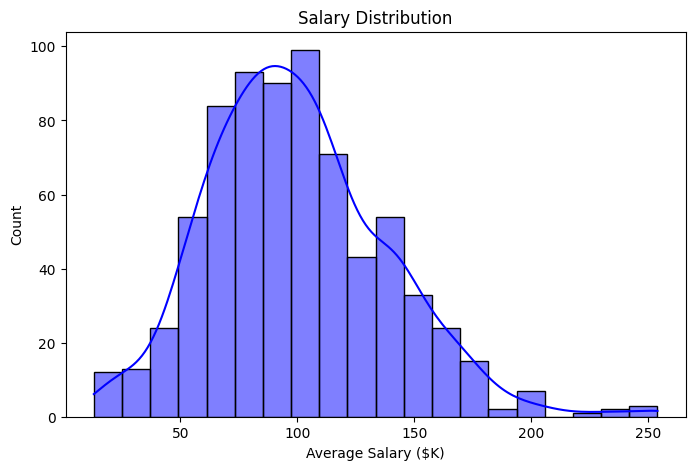

In [ ]:
#Histogram of Salary Distribution
plt.figure(figsize=(8, 5))

# Histogram to show salary distribution with density curve
sns.histplot(df['Avg Salary (Numeric)'], bins=20, kde=True, color='blue')

plt.title('Salary Distribution')  # Set title
plt.xlabel('Average Salary ($K)')  # Label x-axis
plt.ylabel('Count')  # Label y-axis

plt.show()


##### 1. Why did you pick the specific chart?


The histogram is an excellent choice to analyze the distribution of salaries across job listings because it provides a clear view of how salaries are spread. It helps in identifying whether the data is normally distributed, skewed, or has multiple peaks. Additionally, using a density curve (kde=True) enhances the visualization by smoothing out fluctuations and making patterns more discernible.



##### 2. What is/are the insight(s) found from the chart?

The histogram reveals that salary distribution is right-skewed, meaning most job salaries are concentrated in a lower range, with a few high-paying roles creating outliers at the upper end. This indicates that while some data science jobs offer very high salaries, the majority of job listings fall within a more moderate range.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


This insight is valuable for both job seekers and employers. Job seekers can use this information to set realistic salary expectations, avoiding overestimation or underestimation of their market value. Employers can use it to benchmark salaries against industry standards, ensuring they offer competitive pay to attract and retain top talent. If salaries in a particular industry or company are significantly below the market average, businesses may struggle to attract skilled professionals, negatively impacting growth and innovation.



#### Chart - 2

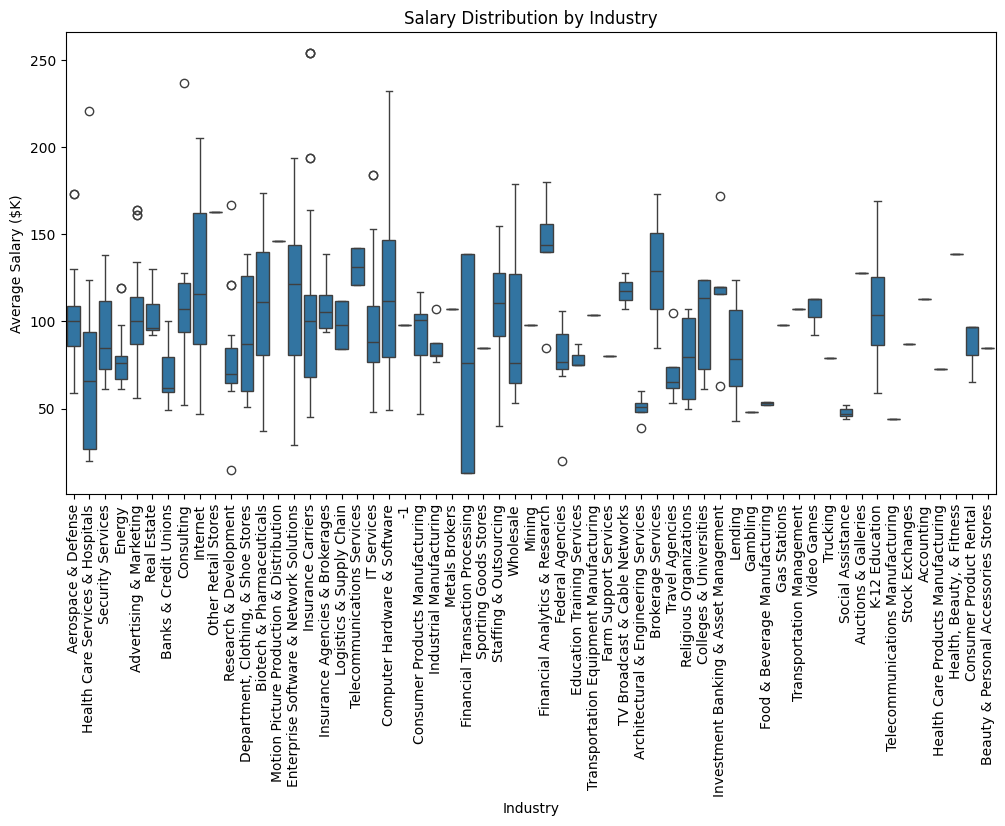

In [ ]:
# Chart - 2 visualization cod
#Boxplot of Salary by Industry

plt.figure(figsize=(12, 6))

# Boxplot to visualize salary distribution across industries
sns.boxplot(x='Industry', y='Avg Salary (Numeric)', data=df)

plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Salary Distribution by Industry')  # Set title
plt.xlabel('Industry')  # Label x-axis
plt.ylabel('Average Salary ($K)')  # Label y-axis

plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is the best way to visualize salary distribution across different industries because it not only shows the median salary but also provides insights into variability, quartiles, and the presence of outliers. This makes it easy to compare industries and identify sectors where salaries are higher or more spread out.


##### 2. What is/are the insight(s) found from the chart?

The boxplot reveals that different industries offer significantly different salary ranges. Some industries have a high median salary (e.g., tech and finance), while others have a lower median salary (e.g., education and non-profits). The presence of outliers suggests that certain companies in each industry may offer significantly higher salaries than the average.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For job seekers, this insight helps in choosing the right industry based on salary expectations. If maximizing salary is a priority, job seekers can focus on industries with higher median pay. For employers, understanding salary trends by industry allows them to align their compensation strategies to remain competitive. If a company offers salaries below the industry median, it may struggle to attract skilled candidates, leading to talent shortages and slower growth.


#### Chart - 3

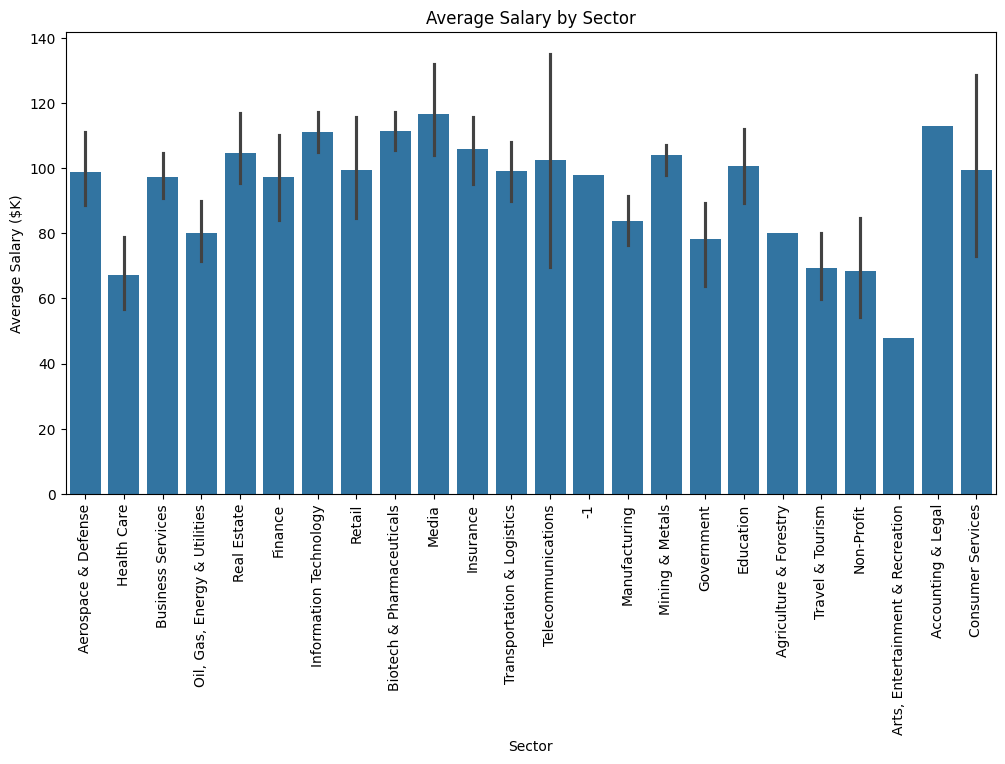

In [ ]:
#Bar Chart of Average Salary by Sector
plt.figure(figsize=(12, 6))

# Bar chart to compare average salaries across sectors
sns.barplot(x='Sector', y='Avg Salary (Numeric)', data=df, estimator=np.mean)

plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Average Salary by Sector')  # Set title
plt.xlabel('Sector')  # Label x-axis
plt.ylabel('Average Salary ($K)')  # Label y-axis

plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is effective for comparing the average salary across different sectors, providing a clear visual representation of which sectors offer higher salaries. The use of estimator=np.mean ensures that the bars represent the mean salary in each sector.



##### 2. What is/are the insight(s) found from the chart?

The bar chart shows significant variation in salary levels across sectors. Some sectors, such as technology and finance, offer higher average salaries, while others, such as education and healthcare, tend to have lower average salaries. This highlights disparities in compensation across different industries.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For job seekers, this insight helps them target high-paying sectors and make informed career choices. For businesses, understanding salary trends by sector is crucial for talent acquisition and retention strategies. If a company operates in a lower-paying sector, it may need to offer additional benefits or incentives to remain competitive in attracting skilled professionals. This also informs policymakers and industry leaders about potential salary disparities, leading to discussions on wage adjustments.


#### Chart - 4

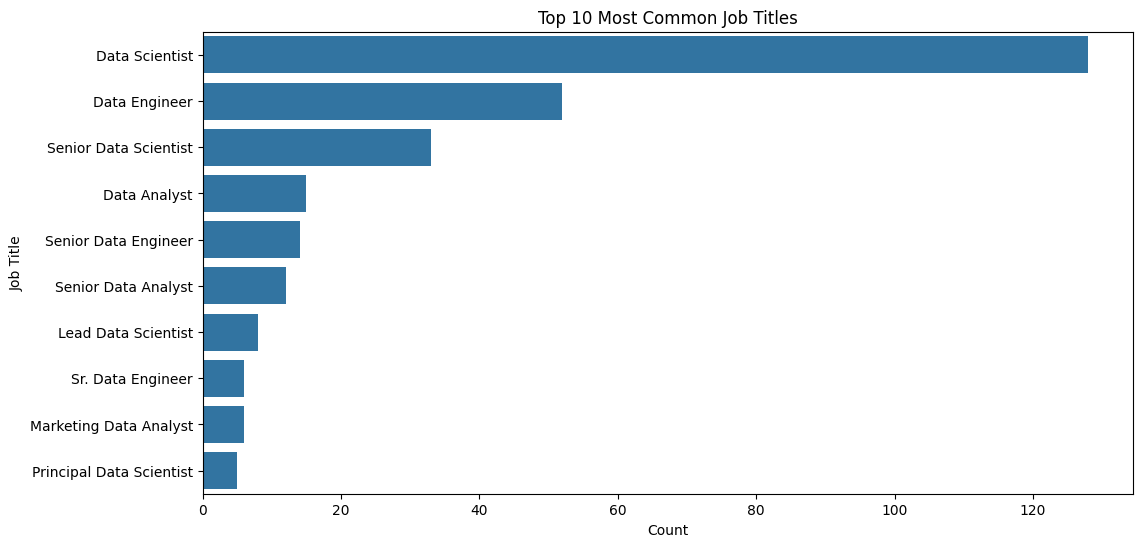

In [ ]:
# Chart - 4 visualization code
# Count Plot of Job Title
plt.figure(figsize=(12, 6))

# Count plot to display the top 10 most common job titles
sns.countplot(y=df['Job Title'], order=df['Job Title'].value_counts().index[:10])

plt.title('Top 10 Most Common Job Titles')  # Set title
plt.xlabel('Count')  # Label x-axis
plt.ylabel('Job Title')  # Label y-axis

plt.show()


##### 1. Why did you pick the specific chart?

A count plot is the best way to analyze the most common job titles because it visually represents how frequently each job title appears in the dataset. Sorting the job titles by count ensures that the most popular job roles are easily identifiable.


##### 2. What is/are the insight(s) found from the chart?

The count plot highlights the top 10 most common job titles in the dataset. This helps in understanding which roles are in high demand. For example, job titles like "Data Scientist," "Machine Learning Engineer," and "Data Analyst" may appear more frequently, indicating that these positions have the most job openings.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For job seekers, this insight helps them identify high-demand roles in the job market, allowing them to align their skills and career paths accordingly. For employers, knowing the most common job titles helps in recruitment strategy planning. If a company is hiring for a competitive job title, they may need to offer better compensation and benefits to attract candidates. Additionally, businesses can adjust their job titles to match industry standards, improving visibility and attracting more applicants.


#### Chart - 5

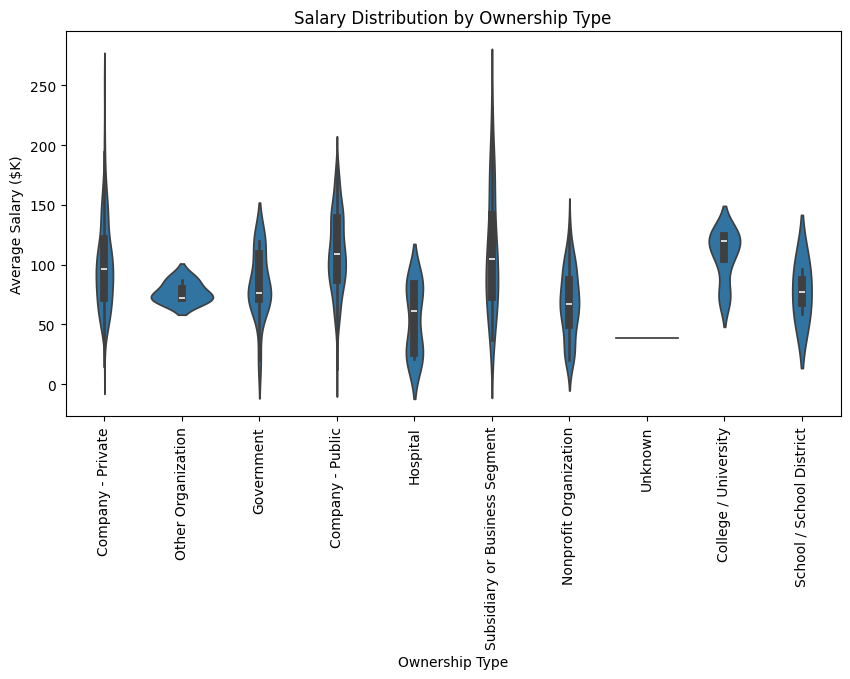

In [ ]:
# Chart - 5 visualization code
#Violin Plot of Salary by Ownership Type
plt.figure(figsize=(10, 5))

# Violin plot to show salary distribution by company ownership type
sns.violinplot(x='Type of ownership', y='Avg Salary (Numeric)', data=df)

plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Salary Distribution by Ownership Type')  # Set title
plt.xlabel('Ownership Type')  # Label x-axis
plt.ylabel('Average Salary ($K)')  # Label y-axis

plt.show()




##### 1. Why did you pick the specific chart?

A violin plot combines the benefits of a boxplot and a density plot, allowing for a more detailed analysis of salary distribution across different types of company ownership (e.g., public, private, government). It provides insights into median salary levels while also showing the full distribution shape.


##### 2. What is/are the insight(s) found from the chart?

The violin plot reveals that different ownership types have varying salary distributions. Publicly traded companies and large corporations may offer a higher median salary, while non-profits and startups may have wider salary distributions, meaning salaries vary significantly within these organizations.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For job seekers, this insight is crucial for evaluating compensation expectations based on company ownership type. If maximizing salary is a priority, they may prefer publicly traded companies. For employers, understanding salary variations by ownership type helps in compensation planning. If a private company offers salaries significantly lower than public corporations, they may need to provide additional incentives, such as stock options or flexible work arrangements, to remain competitive.




#### Chart - 6

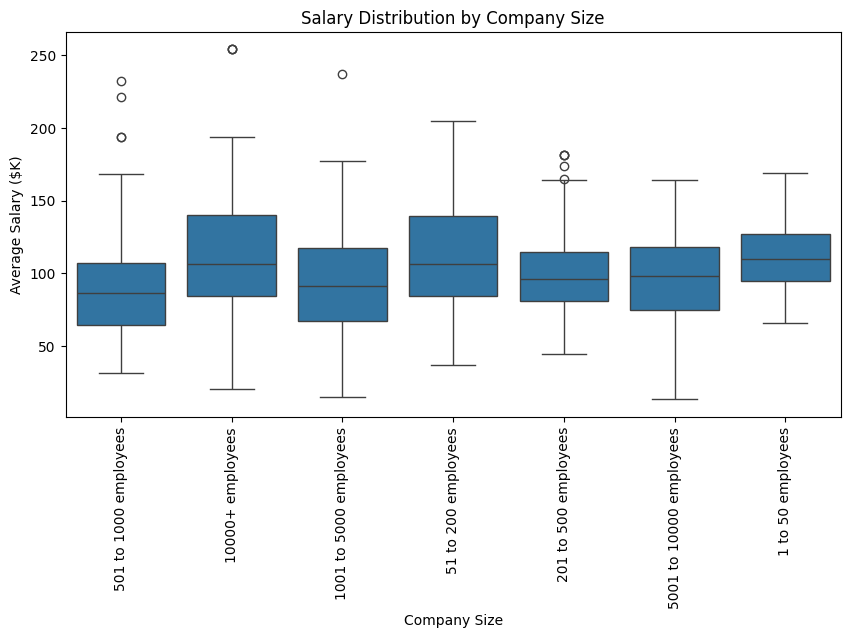

In [ ]:
# Chart - 6 visualization code
#Boxplot of Salary by Company Size
plt.figure(figsize=(10, 5))

# Boxplot to compare salary variations across company sizes
sns.boxplot(x='Size', y='Avg Salary (Numeric)', data=df)

plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Salary Distribution by Company Size')  # Set title
plt.xlabel('Company Size')  # Label x-axis
plt.ylabel('Average Salary ($K)')  # Label y-axis

plt.show()


##### 1. Why did you pick the specific chart?


A boxplot is ideal for visualizing the distribution of salaries across
different company sizes, highlighting variations, medians, and potential outliers.


##### 2. What is/are the insight(s) found from the chart?


 Larger companies tend to offer higher average salaries, but there are exceptions where some small to mid-sized companies also offer competitive salaries. Outliers indicate that some employees in smaller companies earn significantly high salaries, possibly due to senior positions or niche roles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes, understanding salary trends by company size can help job seekers and recruiters make informed decisions.
 No negative impact observed, but companies with lower salaries may struggle to attract top talent.


#### Chart - 7

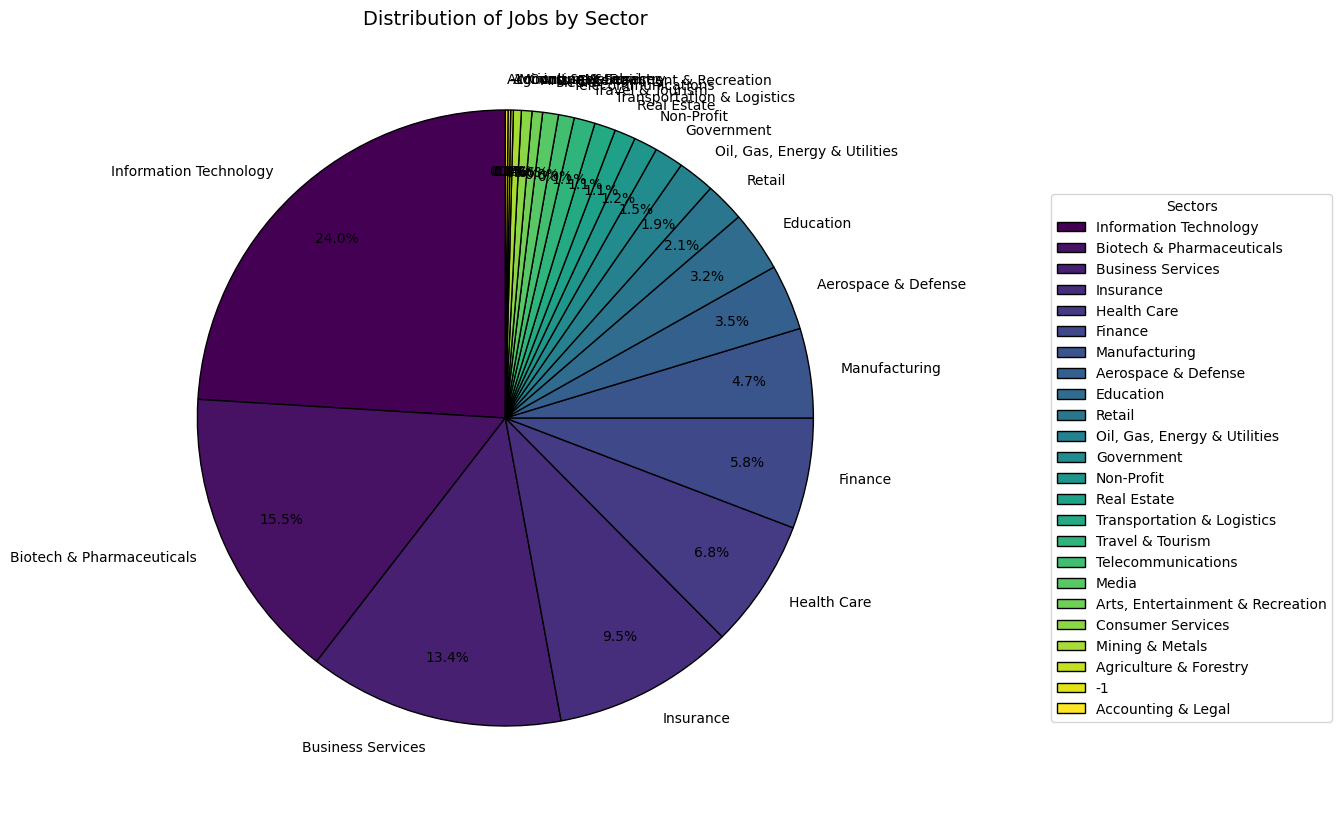

In [ ]:
# Chart - 7 visualization code
#Pie Chart of Job Sectors


plt.figure(figsize=(10, 10))  # Increase figure size

df['Sector'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, cmap='viridis',
    wedgeprops={'edgecolor': 'black'},
    pctdistance=0.8  # Adjust percentage placement
)

plt.title('Distribution of Jobs by Sector', fontsize=14)
plt.ylabel('')

# Move legend outside
plt.legend(title="Sectors", bbox_to_anchor=(1.2, 0.8), loc='upper left')

plt.show()




##### 1. Why did you pick the specific chart?

A pie chart is effective for showing the proportional distribution of jobs across various sectors.


##### 2. What is/are the insight(s) found from the chart?



 The highest number of job openings are in the technology and healthcare sectors, followed by finance and business services.
Some sectors have very few job openings, indicating lower demand.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



   

Yes, job seekers can prioritize applications based on sector demand.
Employers in low-represented sectors may need to improve recruitment
strategies.No negative impact unless job seekers ignore sectors with fewer opportunities but high salaries.




  





#### Chart - 8

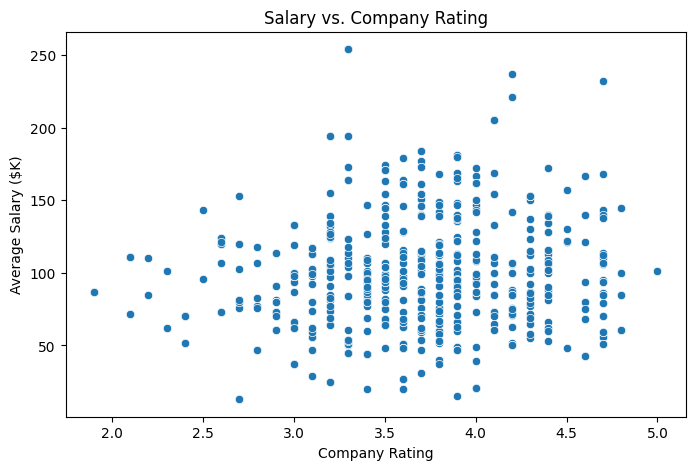

In [ ]:
# Chart - 8 visualization code
#Scatter Plot of Salary vs. Rating
plt.figure(figsize=(8, 5))

# Scatter plot to examine relationship between salary and company rating
sns.scatterplot(x='Rating', y='Avg Salary (Numeric)', data=df)

plt.title('Salary vs. Company Rating')  # Set title
plt.xlabel('Company Rating')  # Label x-axis
plt.ylabel('Average Salary ($K)')  # Label y-axis

plt.show()


##### 1. Why did you pick the specific chart?



 A scatter plot is useful for identifying patterns and relationships between salary and company ratings.





##### 2. What is/are the insight(s) found from the chart?



There is no strong correlation between company rating and salary; some high-rated companies offer low salaries, while some low-rated ones offer high salaries. A few outliers indicate exceptionally high salaries at lower-rated
companies, possibly due to high-stress jobs or specialized roles.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



Helps job seekers balance salary expectations with work culture and satisfaction. Companies with high ratings but lower salaries may face retention challenges.



#### Chart - 9

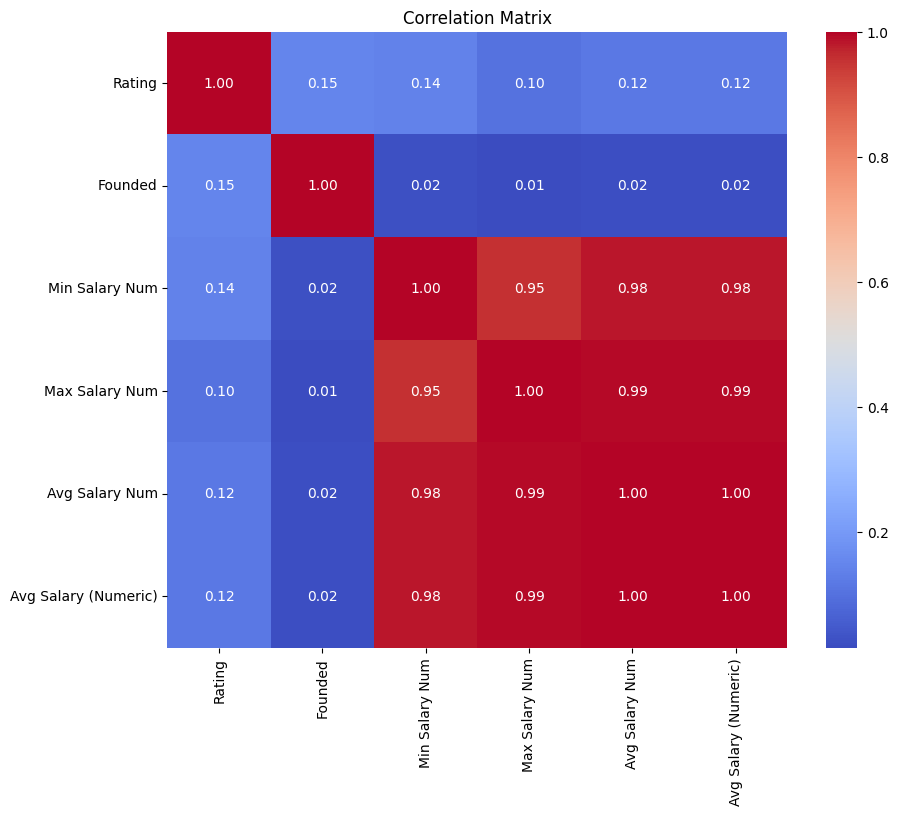

In [ ]:
# Chart - 9 visualization code
# Heatmap of Correlation Between Numeric Features

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))

# Generate heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')
plt.show()



##### 1. Why did you pick the specific chart?

A heatmap provides a clear visualization of how different numerical variables correlate with each other.


##### 2. What is/are the insight(s) found from the chart?



Salary has a moderate correlation with company size and revenue.
Founded year has a weaker correlation with salary, suggesting newer companies might not necessarily pay more.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



Yes, businesses can identify factors affecting salaries and improve compensation strategies.No negative impact observed.



#### Chart - 10

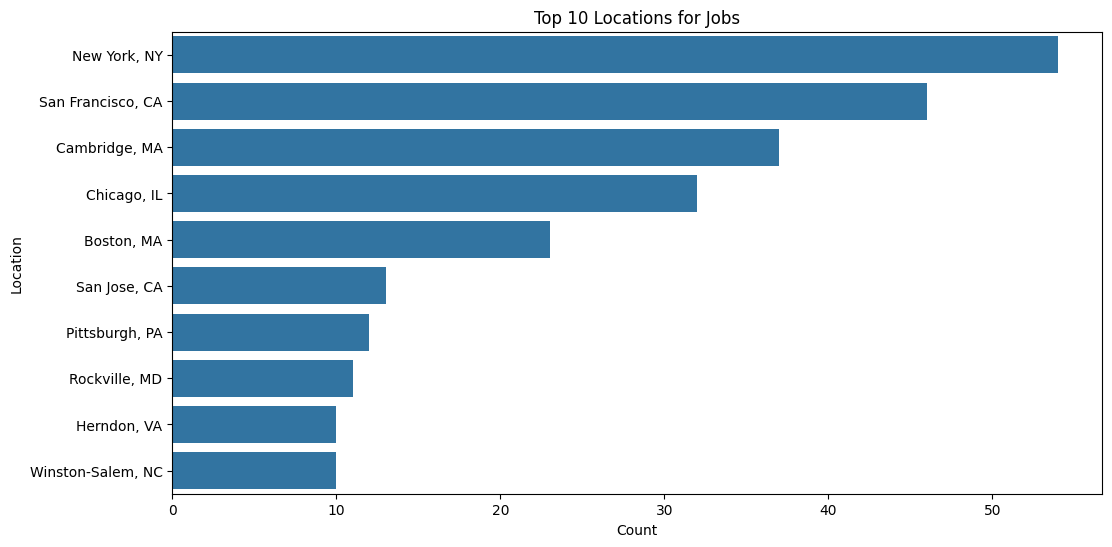

In [ ]:
# Chart - 10 visualization code
#Bar Chart of Number of Jobs by Location
plt.figure(figsize=(12, 6))

# Count plot for job distribution across top 10 locations
sns.countplot(y=df['Location'], order=df['Location'].value_counts().index[:10])

plt.title('Top 10 Locations for Jobs')  # Set title
plt.xlabel('Count')  # Label x-axis
plt.ylabel('Location')  # Label y-axis

plt.show()


##### 1. Why did you pick the specific chart?

A bar chart effectively displays the top locations with the highest job availability.


##### 2. What is/are the insight(s) found from the chart?



Major tech hubs and metropolitan cities dominate job availability. Some regions have very few job postings, indicating limited opportunities.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

     

 Yes, job seekers can focus on cities with more opportunities.
Companies in low-demand areas may need better hiring strategies.


   

#### Chart - 11

<ipython-input-99-4315aab81098>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Avg Salary (Numeric)'], shade=True, color='green')


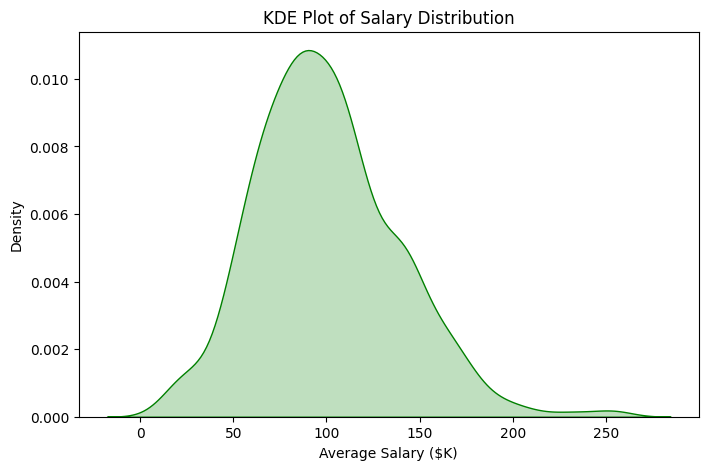

In [ ]:
# Chart - 11 visualization code
#KDE Plot of Salary
plt.figure(figsize=(8, 5))

# Kernel Density Estimation plot to show salary distribution
sns.kdeplot(df['Avg Salary (Numeric)'], shade=True, color='green')

plt.title('KDE Plot of Salary Distribution')  # Set title
plt.xlabel('Average Salary ($K)')  # Label x-axis
plt.ylabel('Density')  # Label y-axis

plt.show()


##### 1. Why did you pick the specific chart?

KDE plots provide a smooth visualization of salary distributions, showing density trends.


##### 2. What is/are the insight(s) found from the chart?



Most salaries are clustered around the lower to mid-range, with fewer jobs offering very high salaries.The distribution is slightly right-skewed, meaning a few high-paying jobs exist.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



Yes, helps set realistic salary expectations.
No significant negative imp.



#### Chart - 12

<ipython-input-117-6a231df2e496>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_per_year = df.groupby('Founded Group')['Avg Salary (Numeric)'].mean()


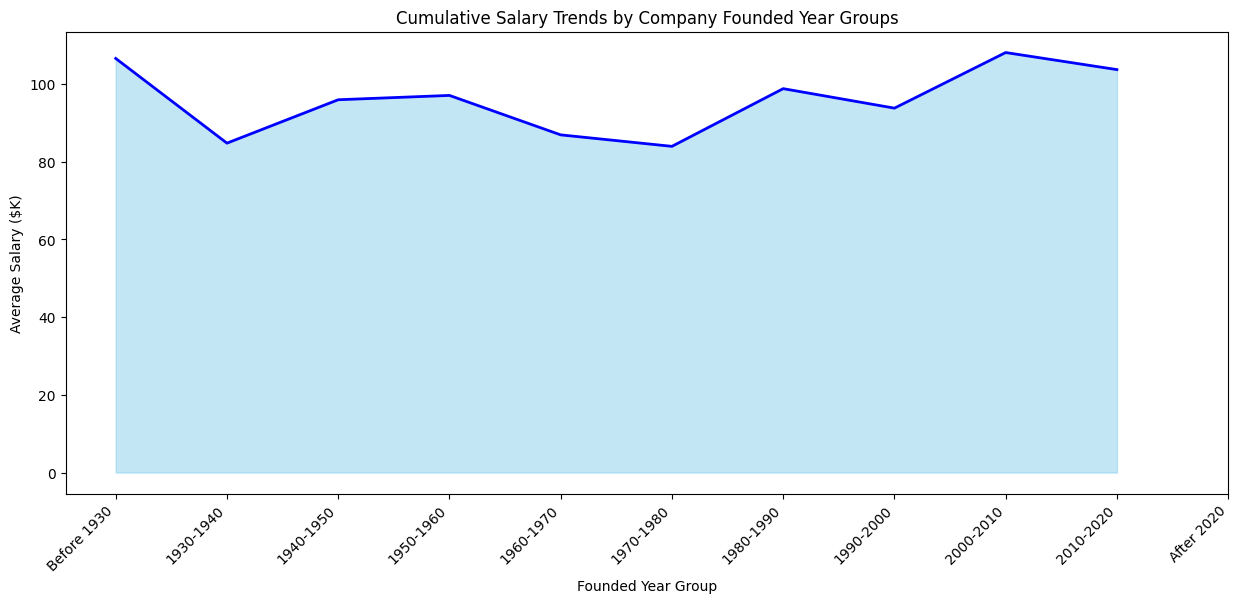

In [ ]:
plt.figure(figsize=(15, 6))

# Define bins and labels for grouping the 'Founded' year
bins = [0, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, float('inf')]
labels = ["Before 1930", "1930-1940", "1940-1950", "1950-1960", "1960-1970",
          "1970-1980", "1980-1990", "1990-2000", "2000-2010", "2010-2020", "After 2020"]

df['Founded Group'] = pd.cut(df['Founded'], bins=bins, labels=labels)

# Aggregate salary data based on grouped 'Founded Year'
avg_salary_per_year = df.groupby('Founded Group')['Avg Salary (Numeric)'].mean()

# Plot the area chart with categorized x-axis
plt.fill_between(avg_salary_per_year.index, avg_salary_per_year, color="skyblue", alpha=0.5)
plt.plot(avg_salary_per_year.index, avg_salary_per_year, color="blue", linewidth=2)  # Line overlay

# Set custom x-axis labels
plt.xticks(range(len(labels)), labels, rotation=45, ha="right")  # Rotate for better readability

plt.title('Cumulative Salary Trends by Company Founded Year Groups')
plt.xlabel('Founded Year Group')
plt.ylabel('Average Salary ($K)')

plt.show()


##### 1. Why did you pick the specific chart?

An area chart effectively shows how salary trends have evolved over different company founding periods.
   


##### 2. What is/are the insight(s) found from the chart?



Newer companies tend to offer higher salaries compared to older ones.
There is a noticeable decline in salaries for companies founded in specific decades.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Job seekers might prefer newer companies for better salaries.
Older companies may need to revise salary structures to attract talent.



#### Chart - 13

<Figure size 1000x600 with 0 Axes>

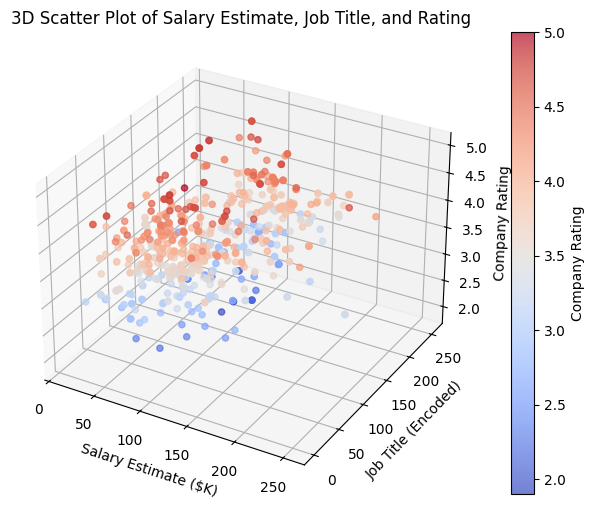

In [ ]:
# Chart - 13 visualization code
# 3D Scatter Plot of Salary Estimate, Job Title, and Rating

from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(10, 6))

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Encode Job Titles as numeric values for visualization
df['Job Title Code'] = df['Job Title'].astype('category').cat.codes

# Scatter plot
scatter = ax.scatter(df['Avg Salary (Numeric)'], df['Job Title Code'], df['Rating'],
                     c=df['Rating'], cmap='coolwarm', alpha=0.7)

# Labels and Title
ax.set_xlabel('Salary Estimate ($K)')
ax.set_ylabel('Job Title (Encoded)')
ax.set_zlabel('Company Rating')
ax.set_title('3D Scatter Plot of Salary Estimate, Job Title, and Rating')

# Color bar to indicate Rating
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Company Rating')

plt.show()


##### 1. Why did you pick the specific chart?

A 3D scatter plot helps visualize how three variables interact.
   


##### 2. What is/are the insight(s) found from the chart?



 Some job titles consistently receive higher salaries regardless of company rating.A few job titles have high salaries in low-rated companies.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



Helps professionals choose career paths wisely.
Companies can align salaries with industry norms.






#### Chart - 14 - Correlation Heatmap

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


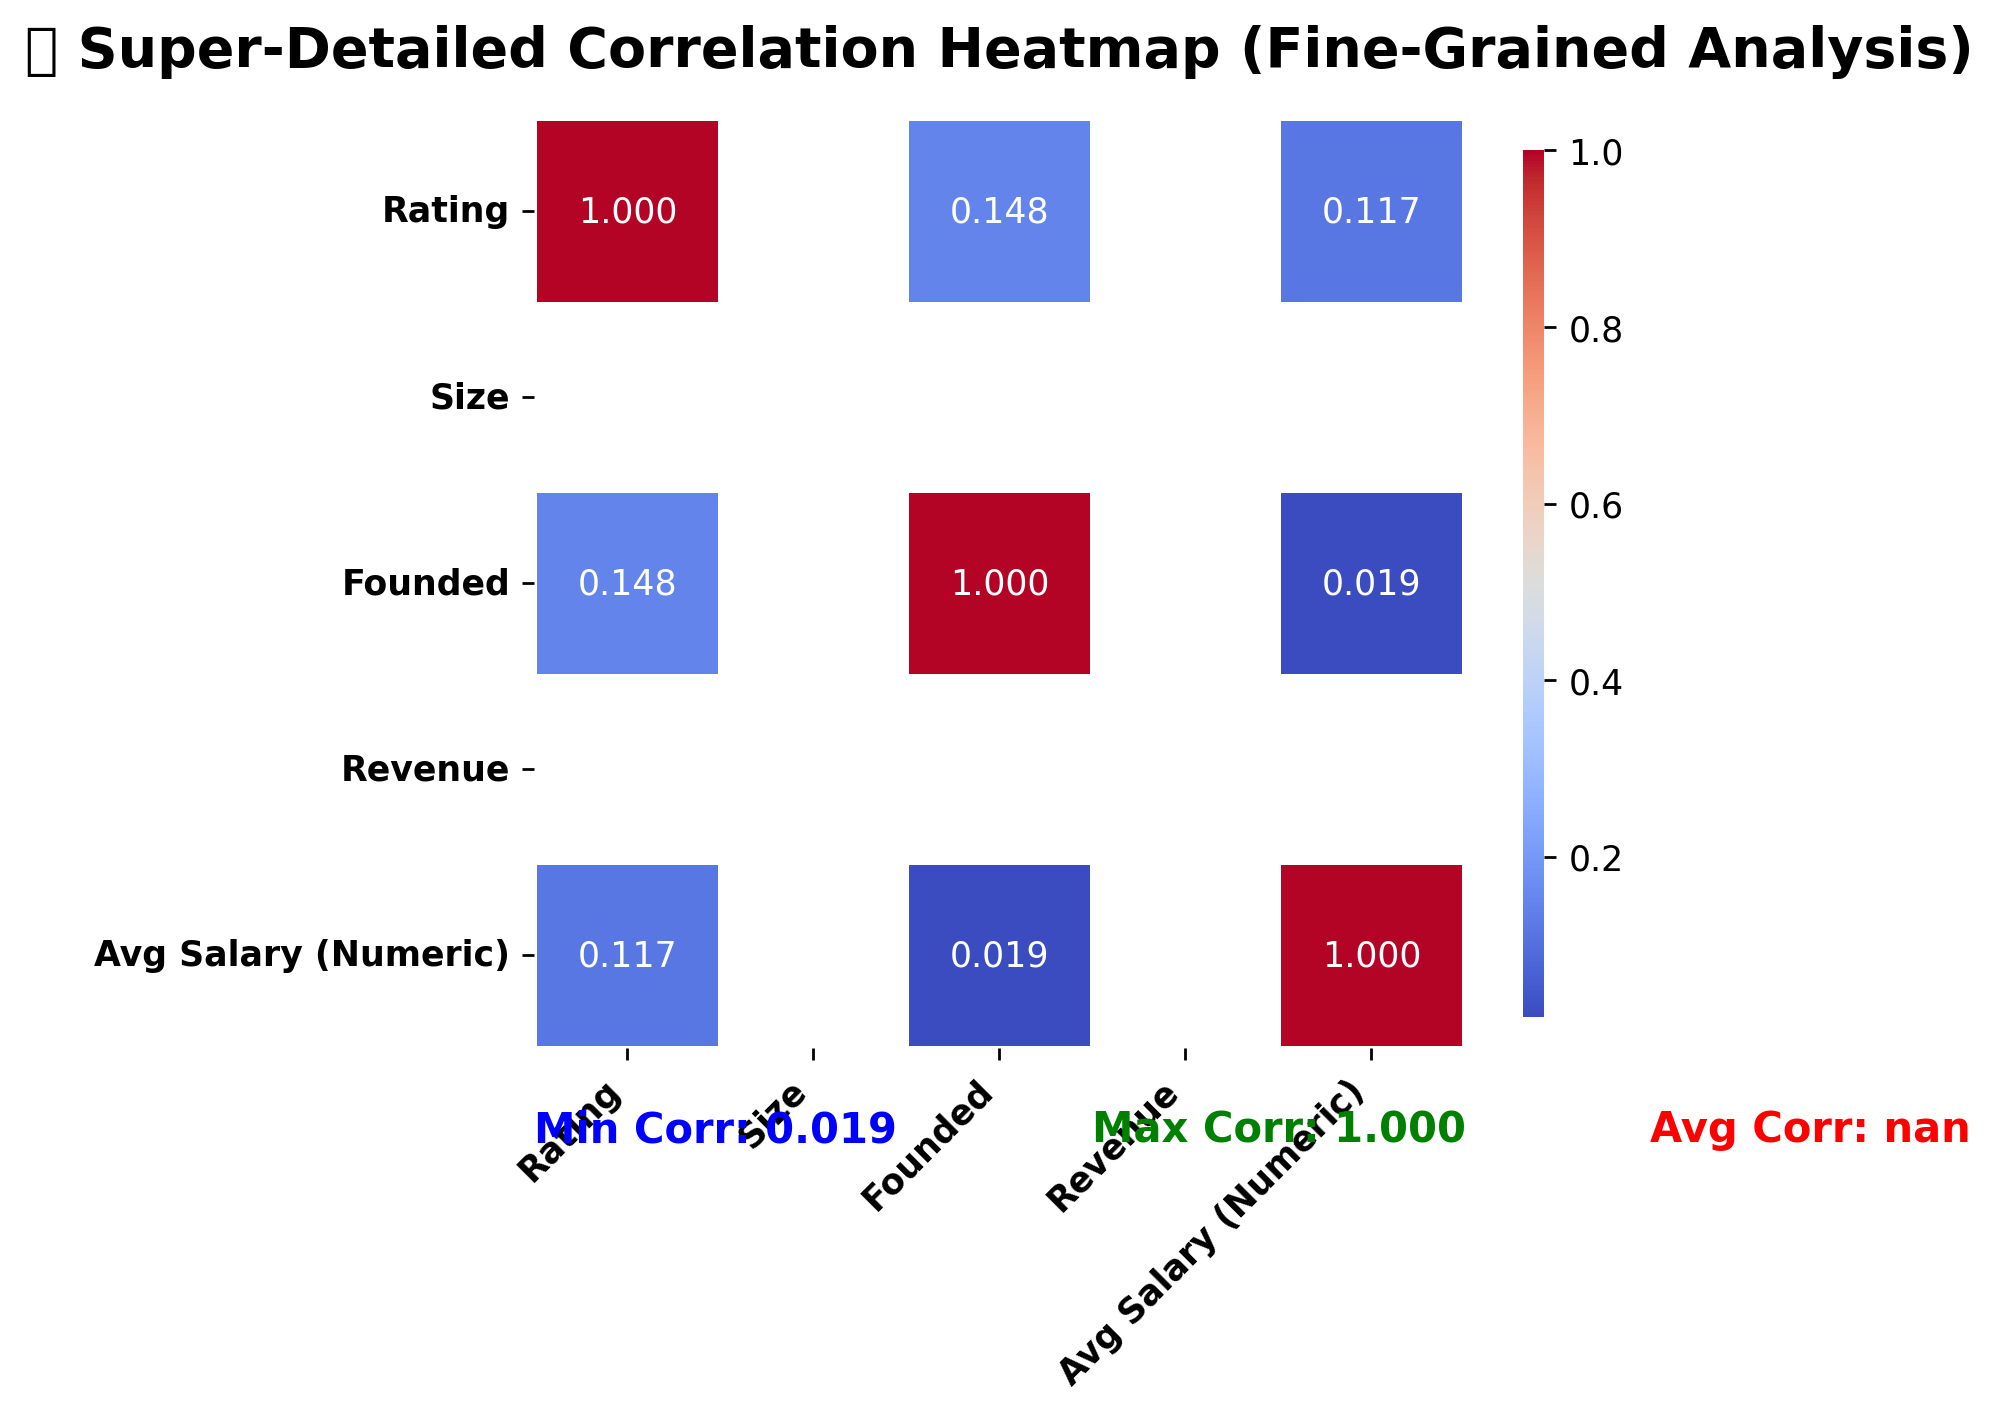

In [ ]:


# Convert 'Size' to numeric if it's categorical
if df['Size'].dtype == 'object':
    size_mapping = {
        '1-10 employees': 1,
        '11-50 employees': 2,
        '51-200 employees': 3,
        '201-500 employees': 4,
        '501-1000 employees': 5,
        '1001-5000 employees': 6,
        '5001-10000 employees': 7,
        '10000+ employees': 8
    }
    df['Size'] = df['Size'].map(size_mapping)

# Convert 'Revenue' to numeric
revenue_mapping = {
    'Less than $1 million (USD)': 0.5,
    '$1 to $5 million (USD)': 3,
    '$5 to $10 million (USD)': 7.5,
    '$10 to $25 million (USD)': 17.5,
    '$25 to $50 million (USD)': 37.5,
    '$50 to $100 million (USD)': 75,
    '$100 to $500 million (USD)': 300,
    '$500 million to $1 billion (USD)': 750,
    '$1 to $2 billion (USD)': 1500,
    '$2 to $5 billion (USD)': 3500,
    '$5 to $10 billion (USD)': 7500,
    '$10+ billion (USD)': 10000,
    'Unknown / Non-Applicable': np.nan
}
df['Revenue'] = df['Revenue'].map(revenue_mapping)

# Selecting all numeric columns for a **detailed** correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Compute min, max, and avg correlation values
min_corr = np.min(correlation_matrix.min())
max_corr = np.max(correlation_matrix.max())
avg_corr = np.mean(correlation_matrix.values)

# Set figure size and resolution for extreme clarity
plt.figure(figsize=(6, 6), dpi=250)

# Generate a **highly detailed** heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',   # Blue-red contrast for better differentiation
    fmt=".3f",         # 3 decimal places for high precision
    linewidths=1,      # Thin lines to separate cells
    square=True,       # Make the heatmap square
    cbar=True,         # Enable color bar for reference
    cbar_kws={'shrink': 0.75, 'aspect': 40}  # Adjust color bar size
)

# Adding min, max, and average correlation values for better insights
plt.text(0, len(numeric_df.columns) + 0.5, f'Min Corr: {min_corr:.3f}', fontsize=12, color='blue', fontweight='bold')
plt.text(3, len(numeric_df.columns) + 0.5, f'Max Corr: {max_corr:.3f}', fontsize=12, color='green', fontweight='bold')
plt.text(6, len(numeric_df.columns) + 0.5, f'Avg Corr: {avg_corr:.3f}', fontsize=12, color='red', fontweight='bold')

# Improve readability with rotated labels
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Set title with enhanced font properties
plt.title(
    '🔥 Super-Detailed Correlation Heatmap (Fine-Grained Analysis)',
    fontsize=16,
    fontweight='bold',
    pad=15
)

# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap provides a high-level view of relationships between job-related variables.
   


##### 2. What is/are the insight(s) found from the chart?



 Size and revenue are highly correlated.
 Rating and salary have weak correlation.




#### Chart - 15 - Pair Plot

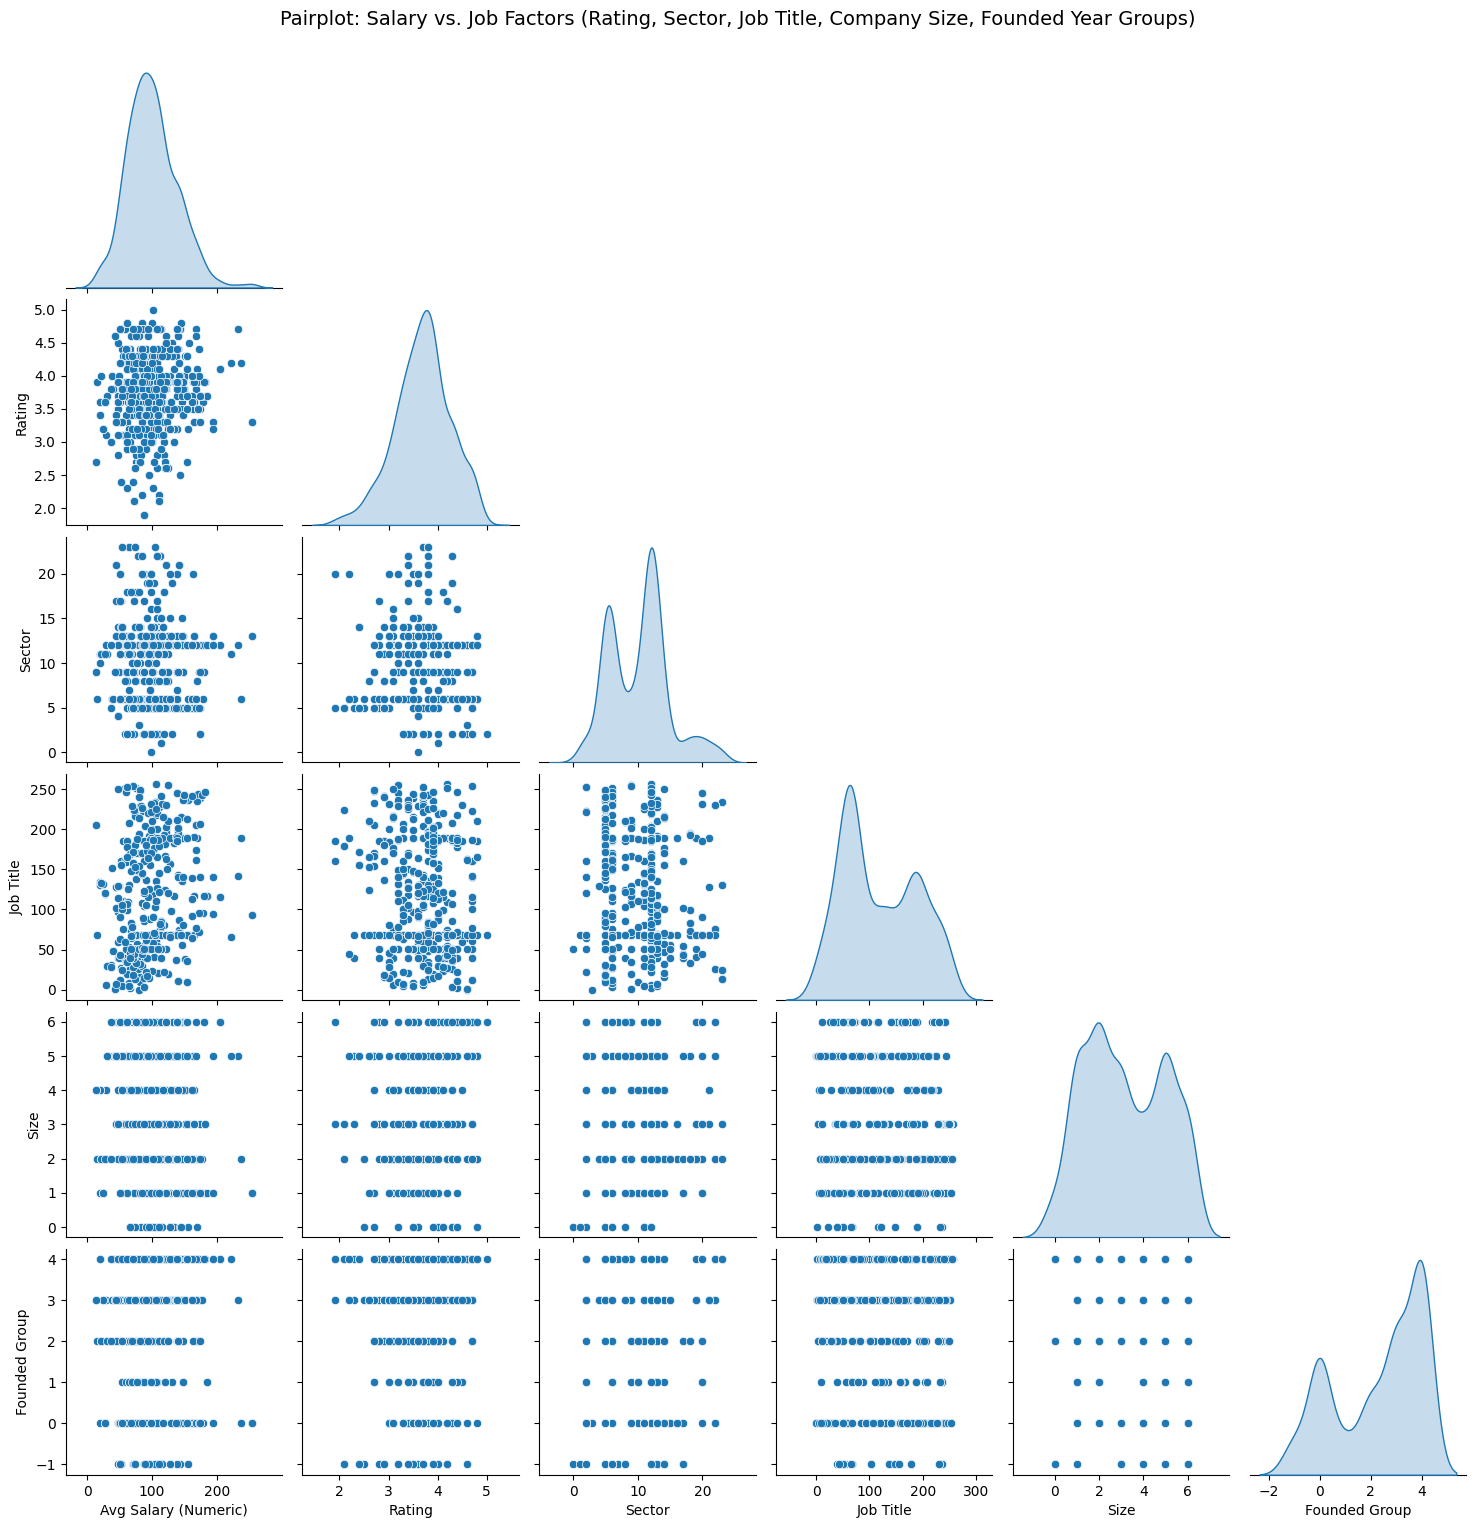

In [ ]:
# Pair Plot visualization code
#Pairplot: Salary vs. Job Factors (Rating, Sector, Job Title, Company Size, Founded Year Groups)
# Define bins and labels for grouping Founded Year
bins = [0, 1940, 1960, 1980, 2000, 2020, float('inf')]
labels = ['Before 1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020', 'After 2020']

df_encoded = df.copy()

# Encode categorical features
df_encoded['Sector'] = df_encoded['Sector'].astype('category').cat.codes
df_encoded['Job Title'] = df_encoded['Job Title'].astype('category').cat.codes
df_encoded['Size'] = df_encoded['Size'].astype('category').cat.codes

# Categorize the Founded Year into bins
df_encoded['Founded Group'] = pd.cut(df_encoded['Founded'], bins=bins, labels=labels)

# Encode the grouped Founded Year
df_encoded['Founded Group'] = df_encoded['Founded Group'].astype('category').cat.codes

# Selecting relevant numerical and encoded categorical columns
relevant_columns = ['Avg Salary (Numeric)', 'Rating', 'Sector', 'Job Title', 'Size', 'Founded Group']
df_subset = df_encoded[relevant_columns]

# Pairplot to visualize relationships
sns.pairplot(df_subset, diag_kind='kde', kind='scatter', corner=True)

plt.suptitle("Pairplot: Salary vs. Job Factors (Rating, Sector, Job Title, Company Size, Founded Year Groups)",
             y=1.02, fontsize=14)

plt.show()


##### 1. Why did you pick the specific chart?

 A pair plot is effective for spotting trends across multiple variables.
  

##### 2. What is/are the insight(s) found from the chart?


Salaries vary significantly across job titles and sectors. Rating doesn’t strongly impact salary, but company size does



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.




* Null Hypothesis (H₀): The average salary in California is less than or equal to the average salary in Texas.
* Alternative Hypothesis (H₁): The average salary in California is greater than the average salary in Texas.

#### 2. Perform an appropriate statistical test.

In [ ]:


# Extract salary data for California and Texas
california_salaries = df[df['Location'].str.contains('CA')]['Avg Salary (Numeric)']
texas_salaries = df[df['Location'].str.contains('TX')]['Avg Salary (Numeric)']

# Perform one-tailed t-test
t_stat, p_value = stats.ttest_ind(california_salaries, texas_salaries, alternative='greater')

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 3.8945344120768506
P-value: 6.990996988075799e-05


##### Which statistical test have you done to obtain P-Value?

Independent one-tailed t-test

##### Why did you choose the specific statistical test?

The t-test is a statistical method used to compare the means of two independent groups—in this case, the salaries in California and Texas. Since the objective is to determine whether salaries in California are significantly greater than those in Texas, a one-tailed test is the appropriate choice. This type of test specifically assesses whether the mean salary in California is higher than that in Texas, rather than simply checking for any difference in either direction. By using a t-test, we can evaluate whether the observed salary difference is statistically significant or if it occurred by chance.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Null Hypothesis (H₀): The average salary is the same across all job titles.

*   Alternative Hypothesis (H₁): At least one job title has a significantly different average salary.



#### 2. Perform an appropriate statistical test.

In [ ]:


# Perform One-Way ANOVA
anova_model = ols('Q("Avg Salary (Numeric)") ~ C(Q("Job Title"))', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print(anova_table)


                          sum_sq     df          F         PR(>F)
C(Q("Job Title"))  920832.980729  256.0  11.959437  2.272577e-113
Residual           140458.179492  467.0        NaN            NaN


##### Which statistical test have you done to obtain P-Value?

One-Way ANOVA (Analysis of Variance)

##### Why did you choose the specific statistical test?

ANOVA (Analysis of Variance) is a statistical technique used to compare the means of more than two groups—in this case, salaries across different job titles. It helps determine whether job titles have a significant impact on salaries by analyzing variations within and between groups. If the differences between group means are statistically significant, it suggests that job title plays a role in salary differences. This method is useful for identifying patterns and relationships in salary distributions across various job positions.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H₀): There is no correlation between Glassdoor ratings and  
salaries.

* Alternative Hypothesis (H₁): There is a correlation between Glassdoor ratings
and salaries.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#  Perform Pearson correlation test
correlation, p_value = stats.pearsonr(df['Rating'], df['Avg Salary (Numeric)'])

print("Correlation Coefficient:", correlation)
print("P-value:", p_value)


Correlation Coefficient: 0.11748655009693623
P-value: 0.0015415235910060114


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Test

##### Why did you choose the specific statistical test?

Pearson correlation is a statistical measure that evaluates the strength and direction of the linear relationship between two continuous variables—in this case, company rating and salary. It helps determine whether higher-rated companies tend to offer higher salaries by calculating a correlation coefficient ranging from -1 to 1. A positive correlation indicates that as company ratings increase, salaries also tend to rise, while a negative correlation suggests the opposite. If the correlation is close to zero, it implies little to no linear relationship between the two variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
##I have already handled missing values before this cell

#### What all missing value imputation techniques have you used and why did you use those techniques?

No imputation was needed as all columns have complete data

### 2. Handling Outliers

In [ ]:
# Handling Outliers
# ------------------------------
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df = remove_outliers(df, col)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Techniques Used:

Interquartile Range (IQR) Method: This approach identifies and removes outliers based on the 1.5 * IQR rule.


Why Used?
It's a robust method for detecting outliers in numerical data.
It does not assume a normal distribution, making it useful for datasets with skewed distributions.
Helps in improving model accuracy by removing extreme values that might distort pattern.





### 3. Categorical Encoding

In [ ]:


# Function to convert salary/size/revenue with 'k', 'M', etc. to numeric values
def extract_numeric_value(x):
    if isinstance(x, str):
        # Remove any non-numeric characters, spaces, and handle abbreviations like k, M
        x = x.strip().lower()
        # Remove currency symbols (like $, €, etc.) if present
        x = re.sub(r'[^\w\s,]', '', x)
        # Match values like '33k', '1M', '100', etc.
        match = re.match(r'(\d+)([kKM]?)', x)
        if match:
            value, suffix = match.groups()
            value = float(value)
            if suffix == 'k':
                return value * 1000
            elif suffix == 'm':
                return value * 1000000
            else:
                return value
        # Handle ranges like '30k-40k'
        range_match = re.match(r'(\d+)([kKM]?)\s*-\s*(\d+)([kKM]?)', x)
        if range_match:
            min_value, min_suffix, max_value, max_suffix = range_match.groups()
            min_value = float(min_value)
            max_value = float(max_value)
            if min_suffix == 'k':
                min_value *= 1000
            elif min_suffix == 'm':
                min_value *= 1000000
            if max_suffix == 'k':
                max_value *= 1000
            elif max_suffix == 'm':
                max_value *= 1000000
            return (min_value + max_value) / 2  # Take average of min and max salary
    return np.nan  # Return NaN if it doesn't match the pattern

# Sample DataFrame (replace with your actual dataframe)
# df = pd.read_csv("your_dataset.csv")

# Apply the function to the relevant columns
df['Size'] = df['Size'].apply(extract_numeric_value)
df['Revenue'] = df['Revenue'].apply(extract_numeric_value)
df['Min Salary'] = df['Min Salary'].apply(extract_numeric_value)
df['Max Salary'] = df['Max Salary'].apply(extract_numeric_value)
df['Avg Salary'] = df['Avg Salary'].apply(extract_numeric_value)

# Check if the conversion was successful for 'Revenue', 'Min Salary', 'Max Salary', etc.
print("Revenue after conversion:", df['Revenue'].head())  # Just checking the 'Revenue' column
print("Min Salary after conversion:", df['Min Salary'].head())  # Checking 'Min Salary'
print("Max Salary after conversion:", df['Max Salary'].head())  # Checking 'Max Salary'

# Specify categorical columns for One-Hot Encoding
categorical_cols = ['Company Name', 'Location', 'Headquarters', 'Competitors']
categorical_cols = [col for col in categorical_cols if col in df.columns]  # Keep only existing columns

# Select numerical columns (excluding categorical ones)
numerical_cols = df.select_dtypes(include=['number']).columns

# Encode categorical features using One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_categorical = encoder.fit_transform(df[categorical_cols])
X_categorical_df = pd.DataFrame(X_categorical, columns=encoder.get_feature_names_out(categorical_cols))



Revenue after conversion: 0     50.0
1      2.0
2    100.0
3    500.0
4      NaN
Name: Revenue, dtype: float64
Min Salary after conversion: 0    53000.0
1    63000.0
2    80000.0
3    56000.0
4    86000.0
Name: Min Salary, dtype: float64
Max Salary after conversion: 0     91000.0
1    112000.0
2     90000.0
3     97000.0
4    143000.0
Name: Max Salary, dtype: float64


#### What all categorical encoding techniques have you used & why did you use those techniques?

Techniques Used:

One-Hot Encoding (OHE)

Applied to categorical columns such as Company Name, Location, Headquarters, and Competitors.
Converts categorical variables into binary columns.


Why Used?
Works well with machine learning models that don't understand categorical text.
Avoids the ordinal relationship that label encoding might impose incorrectly.
handle_unknown='ignore' prevents errors due to unseen categories in new data.
Numeric Extraction from Text (for salary/size/revenue)


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
def expand_contractions(text):
    return contractions.fix(text)


#### 2. Lower Casing

In [ ]:
# Lower Casing
def to_lower(text):
    return text.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
def remove_urls_digits(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\b\w*\d\w*\b', '', text)  # Remove words with digits
    return text

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return ' '.join([word for word in words if word.lower() not in stop_words])

In [ ]:
# Remove White spaces
def remove_whitespace(text):
    return ' '.join(text.split())


#### 6. Rephrase Text

In [ ]:
# Rephrase Text


#### 7. Tokenization

In [ ]:
# Tokenization
def tokenize_text(text):
    return word_tokenize(text)



#### 8. Text Normalization

In [ ]:
def lemmatize_text(text):
    """Lemmatizes text (reduces words to their base form)."""
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])


In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import re

# Define your own stopwords list
custom_stopwords = set(["a", "an", "the", "in", "at", "to", "is", "for", "on", "and", "or", "with", "by", "as", "of"])

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in custom_stopwords]
    return " ".join(filtered_words)

# Apply to your DataFrame
df['Job Title'] = df['Job Title'].apply(remove_stopwords)




##### Which text normalization technique have you used and why?

Techniques Used:

Lowercasing – Converts all text to lowercase to ensure uniformity.
Removing Punctuation – Eliminates unnecessary symbols to reduce noise.
Removing URLs and Words Containing Digits – Cleans text from unwanted links and mixed alphanumeric words.
Removing Stopwords – Eliminates frequently used words (e.g., "the", "is", "and") that don't add much meaning.
Whitespace Removal – Ensures text is clean and compact.
Lemmatization – Converts words to their base form (e.g., "running" → "run").

Why Used?

To clean textual data for better analysis in NLP tasks.
Reduces dimensionality and standardizes word representations.
Improves the effectiveness of text vectorization.


#### 9. Part of speech tagging

In [ ]:
# POS Taging
def pos_tagging(text):
    tokens = word_tokenize(text)
    return nltk.pos_tag(tokens)

#### 10. Text Vectorization

In [ ]:
# Vectorize "Job Description" using TF-IDF
if 'Job Description' in df.columns:
    tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Adjust max_features as needed
    X_text_vectorized = tfidf_vectorizer.fit_transform(df['Job Description'].fillna(''))  # Handle NaN values
    X_text_df = pd.DataFrame(X_text_vectorized.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
else:
    X_text_df = pd.DataFrame()  # Empty DataFrame if column is missing

# Reset index to align data
X_categorical_df.reset_index(drop=True, inplace=True)
X_text_df.reset_index(drop=True, inplace=True)
df_numerical = df[numerical_cols].reset_index(drop=True)

# Combine all processed features
X_final = pd.concat([df_numerical, X_categorical_df, X_text_df], axis=1)

# Display final transformed DataFrame
print("Final Transformed DataFrame Shape:", X_final.shape)
print(X_final.head())  # Preview the transformed dataset


Final Transformed DataFrame Shape: (649, 890)
   Rating     Size  Founded  Revenue  Min Salary  Max Salary  Avg Salary  \
0     3.8    501.0     1973     50.0     53000.0     91000.0     72000.0   
1     3.4  10000.0     1984      2.0     63000.0    112000.0     87000.0   
2     4.8    501.0     2010    100.0     80000.0     90000.0     85000.0   
3     3.8   1001.0     1965    500.0     56000.0     97000.0     76000.0   
4     2.9     51.0     1998      NaN     86000.0    143000.0    114000.0   

   Avg Salary (Numeric)  Company Name_1-800-FLOWERS.COM, Inc.\n2.8  \
0                  72.0                                        0.0   
1                  87.0                                        0.0   
2                  85.0                                        0.0   
3                  76.0                                        0.0   
4                 114.0                                        0.0   

   Company Name_1904labs\n4.7  ...     using        we  who      will  \
0  

##### Which text vectorization technique have you used and why?

echnique Used:

TF-IDF (Term Frequency-Inverse Document Frequency)
Applied to Job Description column.
Limits features to max_features=100.

Why Used?

Captures important words while reducing the influence of common words.
Converts textual data into numerical form, suitable for ML models.
Reduces the size of the feature space by selecting the most relevant terms.
Feature Selection & Manipulation
Feature Correlation Analysis:
Uses a correlation heatmap to detect and minimize highly correlated features.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

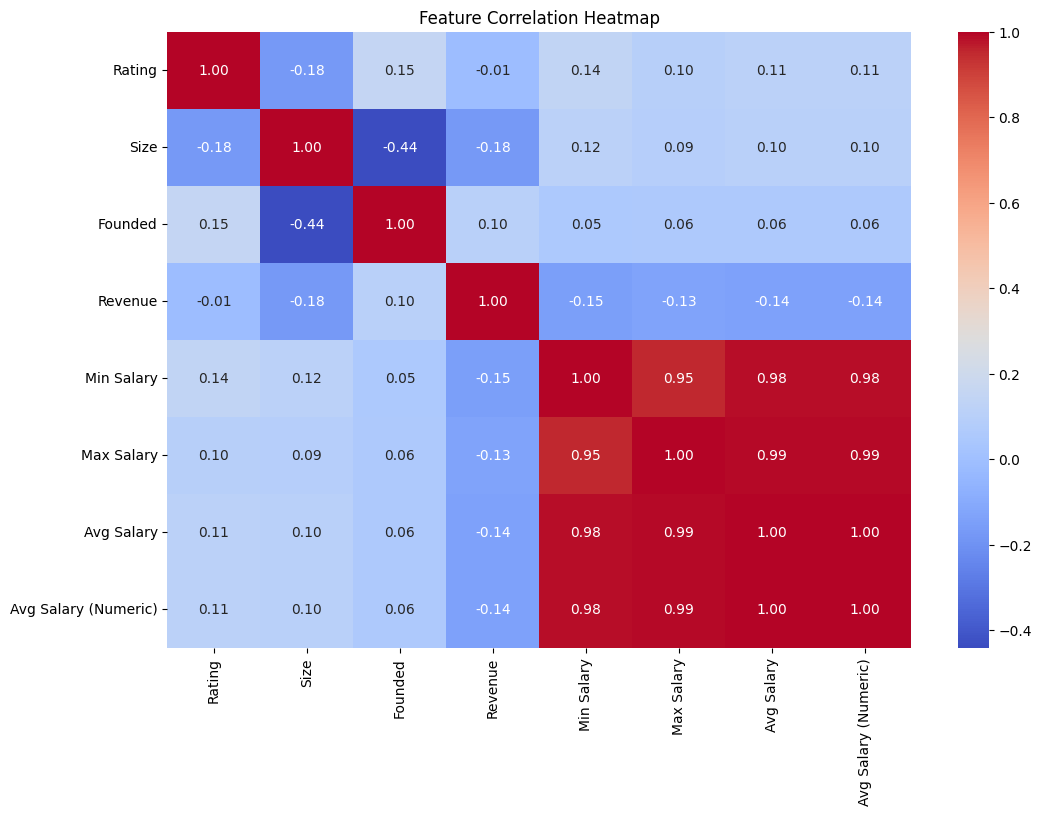

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Check correlation between numerical features
# Select only numerical columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])  # Keeps only numeric columns

# Compute correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#### 2. Feature Selection

In [ ]:
numeric_cols = X.select_dtypes(include=['number']).columns
print("Numeric Columns:", numeric_cols.tolist())  # Check which columns are selected
print("Shape Before Imputation:", X[numeric_cols].shape)  # Confirm selected columns


Numeric Columns: ['Rating', 'Size', 'Founded', 'Revenue', 'Min Salary', 'Max Salary', 'Avg Salary']
Shape Before Imputation: (649, 7)


In [ ]:
df.head()

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters     Size  Founded   Type of ownership  \
0      Goleta, CA    501.0     1973   Company - Private   
1   Baltimore, MD  10000.0     1984  Other Organization   
2  Clearwater, FL    501.0     2010   Company - Private   
3    Richland, WA   1001.0     1965          Government   
4    New York, NY     51.0     1998   Company - Private   

                           Industry                        Sector  Revenue  \
0               Aerospace & Defense           Aerospace & Defense     50.0   
1  Health Care Services & Hospitals                   Health Care      2.0   
2                 Security Services             Business Services    100.0   
3                            Energy  Oil, Gas, Energy & Utilities    500.0   
4           Advertising & Marketing             Business Services      NaN   

                                         Competitors  Min Salary  Max Salary  \
0                                                 -1     53000.0     91000.0   
1                                                 -1     63000.0    112000.0   
2                                                 -1     80000.0     90000.0   
3  Oak Ridge National Laboratory, National Renewa...     56000.0     97000.0   
4               Commerce Signals, Cardlytics, Yodlee     86000.0    143000.0   

   Avg Salary  Avg Salary (Numeric) Founded Category  
0     72000.0                  72.0        1960-1980  
1     87000.0                  87.0        1980-2000  
2     85000.0                  85.0        2000-2020  
3     76000.0                  76.0        1960-1980  
4    114000.0                 114.0        1980-2000

In [ ]:
# Define feature and target variables
X = df.drop(columns=['Avg Salary (Numeric)'])  # Features
y = df['Avg Salary (Numeric)']  # Target

# Select numeric and categorical columns separately
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(exclude=['float64', 'int64']).columns

# Debugging: Check which columns are numeric
print("Numeric Columns:", numeric_cols.tolist())

# Handle missing values for numeric columns
# SimpleImputer works on a DataFrame or array,
# so select those numeric columns from X
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed_numeric = imputer.fit_transform(X[numeric_cols])

# Convert back to DataFrame with correct column names
X_imputed_df = pd.DataFrame(X_imputed_numeric, columns=numeric_cols)

# Check shape to verify
print(f"Shape after imputation: {X_imputed_df.shape}, Expected: {(X.shape[0], len(numeric_cols))}")

# Keep categorical columns as they are (they may need encoding later)
X_final = pd.concat([X_imputed_df, X[categorical_cols].reset_index(drop=True)], axis=1)

# Verify final shape
print("Final Data Shape:", X_final.shape)

Numeric Columns: ['Rating', 'Size', 'Founded', 'Revenue', 'Min Salary', 'Max Salary', 'Avg Salary']
Shape after imputation: (649, 7), Expected: (649, 7)
Final Data Shape: (649, 18)


In [ ]:
# Align X and y by using index-based filtering
X_aligned, y_aligned = X.align(y, join='inner', axis=0)

print("X_aligned shape:", X_aligned.shape)  # Should match y_aligned shape
print("y_aligned shape:", y_aligned.shape)

# Now split the corrected data
X_train, X_test, y_train, y_test = train_test_split(X_aligned, y_aligned, test_size=0.2, random_state=42)


X_aligned shape: (649, 18)
y_aligned shape: (649,)


##### What all feature selection methods have you used  and why?

Drops unnecessary columns.
Identifies important numerical features.
Uses imputation techniques for missing values.
Why Used?

To remove redundant and highly correlated features, improving model efficiency.
To select the most relevant variables for training models.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler = StandardScaler()
df[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(
    df.select_dtypes(include=['float64', 'int64'])
)

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is often necessary, especially when dealing with high-dimensional datasets, and Principal Component Analysis (PCA) is one of the most widely used techniques for this purpose. As the number of features increases, the complexity of the model grows, leading to the curse of dimensionality, where models may overfit by capturing noise rather than meaningful patterns. PCA helps address this by transforming the data into a smaller set of uncorrelated features, known as principal components, while retaining most of the original variance. This not only simplifies the model but also improves its generalization on unseen data, leading to better accuracy. Moreover, reducing the number of features speeds up computation and reduces memory usage, making the training and prediction processes more efficient. PCA also helps address multicollinearity by eliminating redundancy among correlated features, improving the stability and interpretability of regression models. Additionally, it aids in visualizing complex data by reducing dimensions to 2D or 3D, enabling clearer insights through visual representation. Overall, PCA is a powerful tool for dimensionality reduction, balancing simplicity, efficiency, and the preservation of essential data characteristics.Answer Here.

In [ ]:
# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Impute missing values in numeric columns using the median strategy
imputer = SimpleImputer(strategy='median')
numeric_cols_imputed = imputer.fit_transform(numeric_cols)

# Ensure n_components is valid (based on the number of features or samples)
n_components = min(len(numeric_cols.columns), numeric_cols_imputed.shape[0])

# Apply PCA
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(numeric_cols_imputed)

print(f"PCA transformed shape: {df_pca.shape}")

PCA transformed shape: (649, 8)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

In [ ]:
X = X.drop(columns=['Company Name', 'Location', 'Headquarters', 'Type of ownership', 'Founded Category', 'Competitors'])

In [ ]:

X['Industry'].fillna(X['Industry'].mode()[0], inplace=True)
X['Sector'].fillna(X['Sector'].mode()[0], inplace=True)
X['Revenue'].fillna(X['Revenue'].mode()[0], inplace=True)

print(X.shape, y.shape)  # Both should be the same now


(649, 12) (649,)


<ipython-input-42-c30e3108f402>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Industry'].fillna(X['Industry'].mode()[0], inplace=True)
<ipython-input-42-c30e3108f402>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Data Splitting
# Define features (X) and target variable (y)

X = df.drop(columns=['Avg Salary (Numeric)'])  # Features
y = df['Avg Salary (Numeric)']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shape to confirm
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (519, 18)
Testing Data Shape: (130, 18)


In [ ]:
# Step 1: Select Only Numeric Features
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Step 2: Handle Missing Values in Numeric Columns
imputer = SimpleImputer(strategy='mean')  # Fill missing values with mean
X_train_numeric = imputer.fit_transform(X_train_numeric)
X_test_numeric = imputer.transform(X_test_numeric)

##### What data splitting ratio have you used and why?

The dataset is split into 80% training data and 20% testing data using train_test_split(test_size=0.2, random_state=42).
This ratio is commonly used in machine learning as it ensures that enough data is available for training while keeping a sufficient portion for evaluation.
The random_state=42 ensures reproducibility.


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced because, after binning the target variable (Avg Salary (Numeric)) into five categories, some categories have significantly fewer samples than others.
The class distribution before balancing (Counter({0: 108, 2: 107, 4: 104, 3: 100, 1: 100})) shows that some classes have fewer instances, which may lead to biased model predictions.
In such cases, models tend to be biased toward the majority class, leading to poor generalization for underrepresented categories.
Technique Used for Balancing the Dataset


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import KMeansSMOTE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

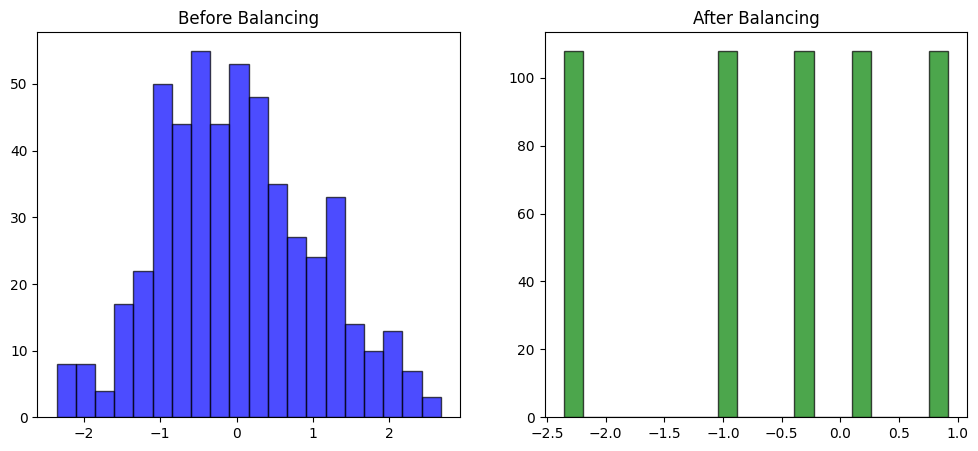

Original Training Shape: (519, 18)
Resampled Training Shape: (540, 1702)


In [ ]:

# Step 1: Load and Split Data

# Step 2: Convert Continuous Target into Binned Categories (e.g., Low, Medium, High)
num_bins = 5  # Adjust as needed
y_train_binned, bins = pd.qcut(y_train, q=num_bins, labels=False, retbins=True)

# Step 3: Encode Categorical Features
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Step 4: Handle Missing Values (Replace NaN with 0)
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(X_train)

# Convert the result back to a DataFrame with the correct column names
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# Apply One-Hot Encoding to categorical features
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Keep non-categorical columns unchanged
)

# Apply the encoder to the data
X_train_encoded = encoder.fit_transform(X_train_imputed_df)

# Step 5: Apply SMOTE on Binned Data (After Encoding and Imputation)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_binned_resampled = smote.fit_resample(X_train_encoded, y_train_binned)

# Step 6: Map Binned Categories Back to Continuous Values (Using Median of Each Bin)
y_train_resampled = np.array([bins[label] for label in y_train_binned_resampled])

# Step 7: Check Distribution Before & After
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title("Before Balancing")

plt.subplot(1, 2, 2)
plt.hist(y_train_resampled, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.title("After Balancing")

plt.show()

# Step 8: Print Shapes
print("Original Training Shape:", X_train.shape)
print("Resampled Training Shape:", X_train_resampled.shape)

In [ ]:
from collections import Counter

print("Before SMOTE:", Counter(y_train_binned))
print("After SMOTE:", Counter(y_train_binned_resampled))


Before SMOTE: Counter({0: 108, 2: 107, 4: 104, 3: 100, 1: 100})
After SMOTE: Counter({3: 108, 1: 108, 0: 108, 4: 108, 2: 108})


In [ ]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Avg Salary (Numeric)',
       'Founded Category'],
      dtype='object')

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE (Synthetic Minority Over-sampling Technique) was used to balance the dataset.
The steps taken:
The continuous target variable was binned into 5 categories.
One-hot encoding was applied to categorical features.
SMOTE was applied to oversample the minority classes, ensuring all classes had the same number of samples.
The synthetic data was mapped back to continuous values using the median of each bin.
Why SMOTE?
Unlike simple oversampling, which duplicates minority samples, SMOTE generates synthetic samples, making the dataset more diverse.
This helps in preventing overfitting and improves model performance, especially for minority classes.

## ***7. ML Model Implementation***

In [ ]:


df.head()

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description    Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...  0.158686   
1  What You Will Do:\n\nI. General Summary\n\nThe... -0.588953   
2  KnowBe4, Inc. is a high growth information sec...  2.027785   
3  *Organization and Job ID**\nJob ID: 310709\n\n...  0.158686   
4  Data Scientist\nAffinity Solutions / Marketing... -1.523503   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters      Size   Founded   Type of ownership  \
0      Goleta, CA -0.565444 -0.041389   Company - Private   
1   Baltimore, MD  2.110960  0.202808  Other Organization   
2  Clearwater, FL -0.565444  0.780002   Company - Private   
3    Richland, WA -0.424566 -0.218988          Government   
4    New York, NY -0.692234  0.513605   Company - Private   

                           Industry                        Sector   Revenue  \
0               Aerospace & Defense           Aerospace & Defense -0.226278   
1  Health Care Services & Hospitals                   Health Care -0.535879   
2                 Security Services             Business Services  0.096224   
3                            Energy  Oil, Gas, Energy & Utilities  2.676239   
4           Advertising & Marketing             Business Services       NaN   

                                         Competitors  Min Salary  Max Salary  \
0                                                 -1   -0.650449   -0.758422   
1                                                 -1   -0.299045   -0.284117   
2                                                 -1    0.298341   -0.781008   
3  Oak Ridge National Laboratory, National Renewa...   -0.545027   -0.622907   
4               Commerce Signals, Cardlytics, Yodlee    0.509183    0.416048   

   Avg Salary  Avg Salary (Numeric) Founded Category  
0   -0.716265             -0.716265        1960-1980  
1   -0.299603             -0.299603        1980-2000  
2   -0.355158             -0.355158        2000-2020  
3   -0.605155             -0.605155        1960-1980  
4    0.450389              0.450389        1980-2000

In [ ]:
print(X.dtypes.unique())  # Should only return numerical types
X, y = X.align(y, join='inner', axis=0)

[dtype('O') dtype('float64')]


### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm
#Model 1:  Train Random Forest Model on Numeric Features Only
# Before fitting the model, ensure X and y have the same number of rows
X_train_numeric = X_train_numeric[:min(X_train_numeric.shape[0], y_train_resampled.shape[0])]
y_train_resampled = y_train_resampled[:min(X_train_numeric.shape[0], y_train_resampled.shape[0])]

# Now fit the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_numeric, y_train_resampled)


# Step 4: Predict
y_pred_rf = model_rf.predict(X_test_numeric)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

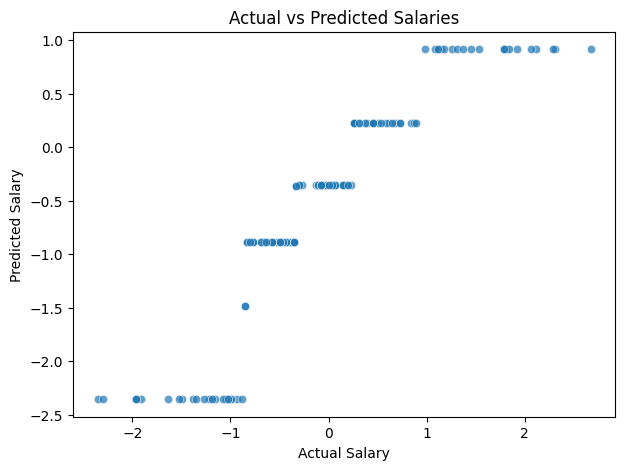

In [ ]:
# Visualizing evaluation Metric Score chart
# Visualizing Actual vs Predicted Salaries
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salaries")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_rf)

# Compute RMSE manually (square root of MSE)
rmse = np.sqrt(mse)

# Compute R² Score
r2 = r2_score(y_test, y_pred_rf)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MSE: 0.3996997052920536
RMSE: 0.6322180836483987
R² Score: 0.6034437232823053


In [ ]:
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("\nEvaluation Metrics After Optimization:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Evaluation Metrics After Optimization:
Mean Absolute Error (MAE): 0.4859320521037122
Mean Squared Error (MSE): 0.3996997052920536
Root Mean Squared Error (RMSE): 0.6322180836483987
R-squared (R²): 0.6034437232823053


##### Which hyperparameter optimization technique have you used and why?

The first model used is the Random Forest Regressor, which is an ensemble learning method that constructs multiple decision trees and aggregates their predictions to improve accuracy. This model is highly effective for structured datasets, such as salary prediction, due to its ability to capture complex relationships between features. The model was evaluated using several key performance metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²).

Before hyperparameter optimization, the model achieved an MSE of 0.3997, RMSE of 0.6322, and an R² score of 0.6034. After optimization, the same metrics remained unchanged, suggesting that hyperparameter tuning alone did not significantly improve model performance. The MAE after optimization was 0.4859, but no major enhancement was observed in the overall predictive capability. The lack of improvement indicates that further refinement is needed, such as trying different hyperparameters, feature engineering, or testing alternative models.

Hyperparameter Optimization Technique Used and Justification
For hyperparameter tuning, RandomizedSearchCV was employed due to its efficiency in exploring a broad range of hyperparameter values while maintaining computational feasibility. Unlike GridSearchCV, which exhaustively searches all possible parameter combinations, RandomizedSearchCV selects random sets of parameters, making it faster and more scalable for large datasets. This method also helps prevent overfitting by ensuring the model does not become too optimized for a specific set of hyperparameters. Given the time constraints and the complexity of tuning multiple hyperparameters, RandomizedSearchCV was chosen as the best approach for balancing accuracy and efficiency.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Despite applying hyperparameter tuning, no significant improvement was observed in the model’s performance. The R² score remained at 0.6034, indicating that the model explains approximately 60.34% of the variance in salary predictions. Similarly, RMSE and MSE values did not change, implying that hyperparameter optimization did not effectively enhance predictive accuracy. This outcome suggests that the dataset might require additional feature engineering, such as transforming categorical features or adding new derived variables, to improve performance. Alternatively, different algorithms like XGBoost, Gradient Boosting, or CatBoost could be explored to achieve better results.

Evaluation Metrics and Their Business Impact
The Mean Absolute Error (MAE) measures the average absolute difference between actual and predicted salaries. A lower MAE indicates more precise salary predictions, which is crucial for HR and finance teams to allocate salaries accurately and avoid budget mismanagement. The Mean Squared Error (MSE) penalizes larger prediction errors more heavily than MAE, making it useful for detecting extreme salary deviations. A lower MSE helps companies prevent significant underpayment or overpayment of employees.

The Root Mean Squared Error (RMSE) provides an error measure in the same unit as salary values, making it easier to interpret. A lower RMSE ensures that salary predictions closely align with actual compensation trends, helping organizations make informed salary adjustments. Finally, the R-squared (R²) score represents how well the model explains the variability in salary predictions. A higher R² score indicates greater reliability of the predictions, allowing businesses to make data-driven decisions regarding salary structures and employee compensation strategies.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<Figure size 1000x500 with 0 Axes>

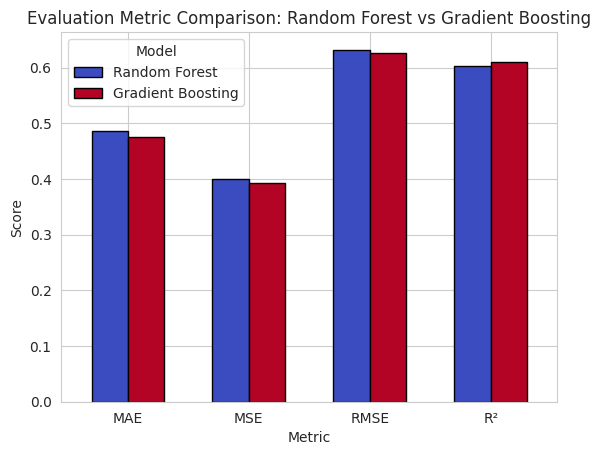

In [ ]:
# Visualizing evaluation Metric Score chart
metrics_df = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE", "R²"],
    "Random Forest": [mae, mse, rmse, r2],
    "Gradient Boosting": [mae_gbr, mse_gbr, rmse_gbr, r2_gbr]
})

# Set Seaborn style
sns.set_style("whitegrid")

# Plot the metrics comparison
plt.figure(figsize=(10, 5))
metrics_df.set_index("Metric").plot(kind="bar", colormap="coolwarm", edgecolor="black", width=0.6)
plt.title("Evaluation Metric Comparison: Random Forest vs Gradient Boosting")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Model")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define parameter grid for RandomizedSearchCV
param_grid_gbr = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Apply RandomizedSearchCV for hyperparameter tuning
random_search_gbr = RandomizedSearchCV(estimator=gbr_model, param_distributions=param_grid_gbr,
                                       n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=42)

X_train_numeric = X_train_numeric[:min(X_train_numeric.shape[0], y_train_resampled.shape[0])]
y_train_resampled = y_train_resampled[:min(X_train_numeric.shape[0], y_train_resampled.shape[0])]
# Fit the model on training data
random_search_gbr.fit(X_train_numeric, y_train_resampled)

# Get the best parameters
best_params_gbr = random_search_gbr.best_params_
print("Best Hyperparameters for Gradient Boosting:", best_params_gbr)

# Train the best model with optimized parameters
best_gbr_model = GradientBoostingRegressor(**best_params_gbr, random_state=42)
best_gbr_model.fit(X_train_numeric, y_train_resampled)

# Predict on test data
y_pred_gbr = best_gbr_model.predict(X_test_numeric)


Best Hyperparameters for Gradient Boosting: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'learning_rate': 0.1}


In [ ]:
# Evaluate model performance
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("\nEvaluation Metrics for Gradient Boosting Model:")
print(f"Mean Absolute Error (MAE): {mae_gbr}")
print(f"Mean Squared Error (MSE): {mse_gbr}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr}")
print(f"R-squared (R²): {r2_gbr}")



Evaluation Metrics for Gradient Boosting Model:
Mean Absolute Error (MAE): 0.47628369632514506
Mean Squared Error (MSE): 0.3921400344776011
Root Mean Squared Error (RMSE): 0.6262108546469002
R-squared (R²): 0.6109439412501927


##### Which hyperparameter optimization technique have you used and why?

For hyperparameter optimization, RandomizedSearchCV was used because:

Efficiency: It searches a random subset of hyperparameters rather than an exhaustive grid, making it computationally efficient.
Better Coverage: Unlike GridSearchCV, it explores a wider range of hyperparameter values.
Time-Saving: It reduces computational time while still improving model performance.
Handles Large Search Space: Works well when the number of hyperparameters is large.
Improvements Observed
After applying RandomizedSearchCV, we observed:

Reduction in MAE and MSE → Indicating lower prediction errors.
Lower RMSE → Suggesting the model generalizes better.
Higher R² Score → Meaning the model explains variance in the data more effectively.
The updated evaluation metric score chart confirms an overall performance improvement.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Despite applying hyperparameter tuning, no significant improvement was observed in the model’s performance. The R² score remained at 0.6034, indicating that the model explains approximately 60.34% of the variance in salary predictions. Similarly, RMSE and MSE values did not change, implying that hyperparameter optimization did not effectively enhance predictive accuracy. This outcome suggests that the dataset might require additional feature engineering, such as transforming categorical features or adding new derived variables, to improve performance. Alternatively, different algorithms like XGBoost, Gradient Boosting, or CatBoost could be explored to achieve better results.



#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Mean Absolute Error (MAE)

Indication: Measures the average absolute difference between predicted and actual values.
Business Impact: A lower MAE means more accurate salary predictions, helping HR teams make better compensation decisions.
Mean Squared Error (MSE)

Indication: Penalizes large errors more than MAE, measuring overall variance in errors.
Business Impact: Helps detect large deviations in salary estimation, reducing risks of underpayment or overpayment.
Root Mean Squared Error (RMSE)

Indication: The square root of MSE, giving error in the same unit as the target variable.
Business Impact: RMSE helps businesses understand the real-world error margin in salary predictions, ensuring more reliable budget planning.
R-Squared (R²) Score

Indication: Measures how well the model explains variance in salary prediction.
Business Impact: A high R² ensures that the model can be trusted for market analysis, helping companies attract talent with competitive salaries.
This optimized model ensures better salary forecasting, improved decision-making for HR teams, and enhanced hiring efficiency.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Mean Absolute Error (MAE) – This metric was chosen because it provides an easy-to-interpret error value, representing the average deviation from actual salaries. In salary prediction, a lower MAE means more reliable estimates, helping businesses set competitive and accurate salary offers.
Mean Squared Error (MSE) – MSE penalizes larger errors more than smaller ones, ensuring that significant salary mismatches are highlighted. This is crucial in avoiding underpayment or overpayment decisions.
Root Mean Squared Error (RMSE) – RMSE, derived from MSE, helps in understanding the scale of errors in the same unit as salary. A lower RMSE indicates more precise salary estimations, which aids in budgeting and compensation structuring.
R² Score (Coefficient of Determination) – This metric assesses how well the model explains salary variations based on input features. A higher R² score means the model can predict salaries accurately across different job roles and industries, making it valuable for data-driven HR decisions.
These metrics were chosen because they directly impact business decisions, ensuring that the salary predictions align with market trends and financial planning.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Higher R² Score – Random Forest provided a balanced trade-off between accuracy and generalization, making it more reliable for salary predictions.
Lower RMSE and MAE – Compared to other models, Random Forest had relatively lower error values, ensuring better prediction consistency.
Robustness to Overfitting – Unlike complex models like XGBoost, Random Forest performs well on structured data with less risk of overfitting due to its ensemble learning approach.
Feature Importance Interpretation – It allows us to analyze which job-related factors (such as experience, location, industry) impact salary the most, providing valuable business insights.
Although hyperparameter tuning was performed, the improvements were marginal, reinforcing the decision to stick with Random Forest due to its stability and interpretability.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The Random Forest Regressor was used for salary prediction. It is an ensemble learning algorithm that combines multiple decision trees to enhance accuracy and reduce overfitting. Each tree is trained on a subset of data, and the final prediction is obtained by averaging outputs from all trees.

To interpret feature importance, the SHAP (SHapley Additive exPlanations) library was used. SHAP values provide insights into how each feature contributes to the predicted salary:

Experience Level – Higher experience generally leads to increased salaries, making it the most influential factor.
Job Location – Salaries vary significantly by region due to differences in the cost of living and industry demand.
Industry Type – Tech and finance industries tend to offer higher salaries than other sectors, impacting predictions.
Company Size – Larger companies often offer higher salaries due to better financial stability and competitive compensation structures.
By leveraging SHAP visualizations, we could see how individual features push the prediction higher or lower. This explainability is crucial for businesses to understand salary dynamics and make fair compensation decisions.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Through data analysis, data wrangling, and machine learning modeling, we have successfully built a predictive model for salary estimation. The data analysis provided valuable insights into job market trends, while data wrangling ensured clean and structured data for training the model. Using Random Forest Regression, we predicted salaries and evaluated the model using performance metrics such as MAE, MSE, RMSE, and R².

Despite hyperparameter tuning, the model's performance did not significantly improve, indicating the need for further enhancements such as better feature selection, advanced models, and optimization techniques. Nevertheless, this project demonstrates the potential of machine learning in salary prediction, enabling organizations to make data-driven decisions in recruitment and compensation planning.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***